# SESSION 1 : Intro to XGBoost

https://www.youtube.com/watch?v=C6aDw4y8qJ0&t=3s

1. Cross Platform


2. Multiple Language Support


3. Integration with other libraries and tools


4. Support all kinds of ML problems

## 1. Flexibility

1. Cross Platform


2. Multiple Language Support


3. Integration with other libraries and tools


4. Support all kinds of ML problems

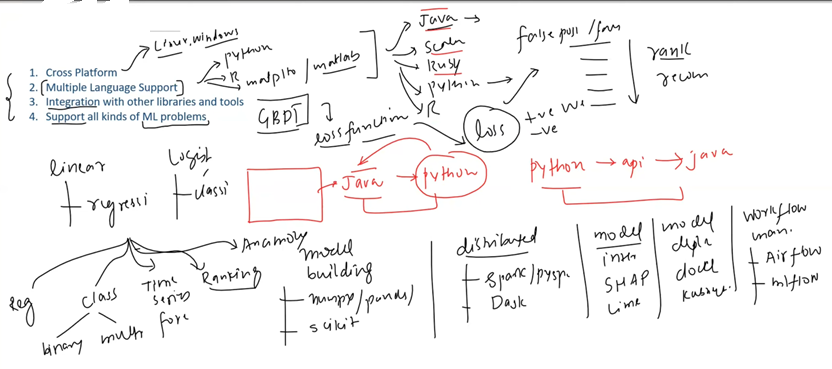

## 2. Speed

1. Parallel Processing (decision tree on each column is trained parallely)


2. Optimized Data Structures (internally XGBoost save data column wise instead of row wise)


3. Cache Awareness


4. Out of Core computing (dividing data in chunks)


5. Distributed Computing


6. GPU Support : `tree_method = gpu_hist`

#### SPEED : XGBoost is 10 times faster than Gradient Boost and other algos

## 3. Performance

1. Regularized Learning Objective : Regularisation can be added in xgboost


2. Handling Missing values : 


3. Sparsity Aware Split Finding : 


4. Efficient Split Finding(Weighted Quantile Sketch-> binning the numerical columns + Approximate Tree Learning)


5. Tree Pruning

## XGBoost Optimizations : How XGBoost is efficient with large datasets.

### 1. Approximate Greedy Algorithm : 

#### When dataset is huge, XGBoost uses Approximate Greedy Algorithm. Other it uses normal Greedy Algorithm

XGBoost makes decision without looking ahead to see, if it is not the absolute best choice in the long term. XGBoost can build a tree relatively quickly because of it, as it doesn't checks all the possible threshold for other leaves and split is done early on. The decision to use the threshold that gives the largest __Gain__ is made without worrying about how the leaves will be split later.

When we have a lot of datapoints, then Greedy Algortihm becomes slow because it has to still look at every possible threshold.

So instead of checking all the values we can divide it in __Qunatiles__ and only use these quantiles as candidate to split the observations.

eg: instead of using the smallest 2 dosages to define threshold, The Approximate Greedy Algorithm uses the 1st quantile to define the threshold.


by deafult Approximate Greedy Algorithm uses __about__ 33 quantiles.

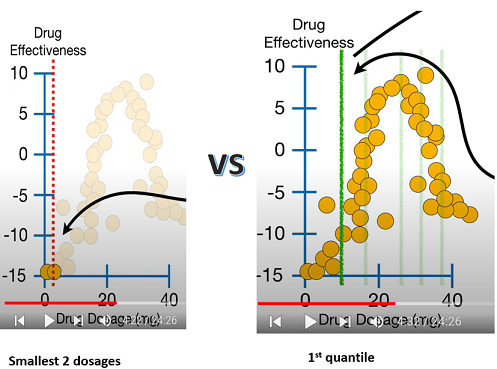

### 2. Parallel Learning

We split the data into small pieces and put the pieces on different computers on a network. The __Quantile Sketch Algorithm__ combines the values from each computer to make an approximate histogram. Then the approxiamte histogram is used to calculate approximate quantiles. 

Approximate Greedy Algorithm uses approximate quantiles.

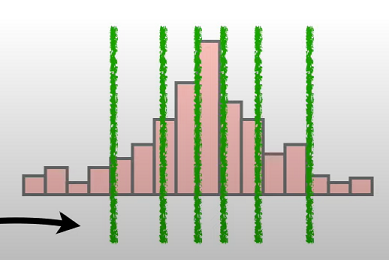

### 3. Weighted Quantile Sketch : merges data from different computers to form a histogram.


Approximate Greedy Algorithm uses **Weighted Quantiles** instead of normal quantiles. 

>what are weighted Quantiles?

Usually quantiles are set up so that the same number of observations are in each one.  i.e 10 observations will be in each qunatiles.

<span class="mark">But in Weighted Qunatile, each observation has a corresponding weights and the sum of the weights are same in each quantile i.e sum of weights in each quantile is 10.</span>

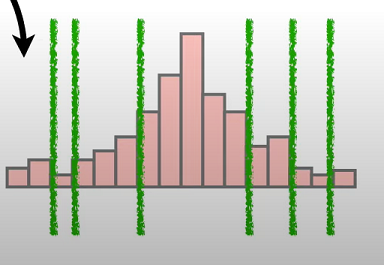

The weights are derived from the __Cover__ metric. Specifically the weight for each observation is the 2nd derivative of the Loss function, that we are referring as **Hessian**

#### NOTE: 

- **For Regression the weights are equal to 1. i.e the weighted quantiles are same as normal qunatiles and contain equal number of observations in case of Regression.**


- **For Classification the weights = Previous Probability * (1 - Previous Probability)**

The approximate histogram is divided into weighted qunatiles that put observations with low confidence predictions into qunatiles with fewer observations. 

When using XGBoost for Classification, the weights for the Weighted Quantile Sketch are calculated from the previously predicted probability(0.5 in this case). 

Weights are calculated after building each tree.

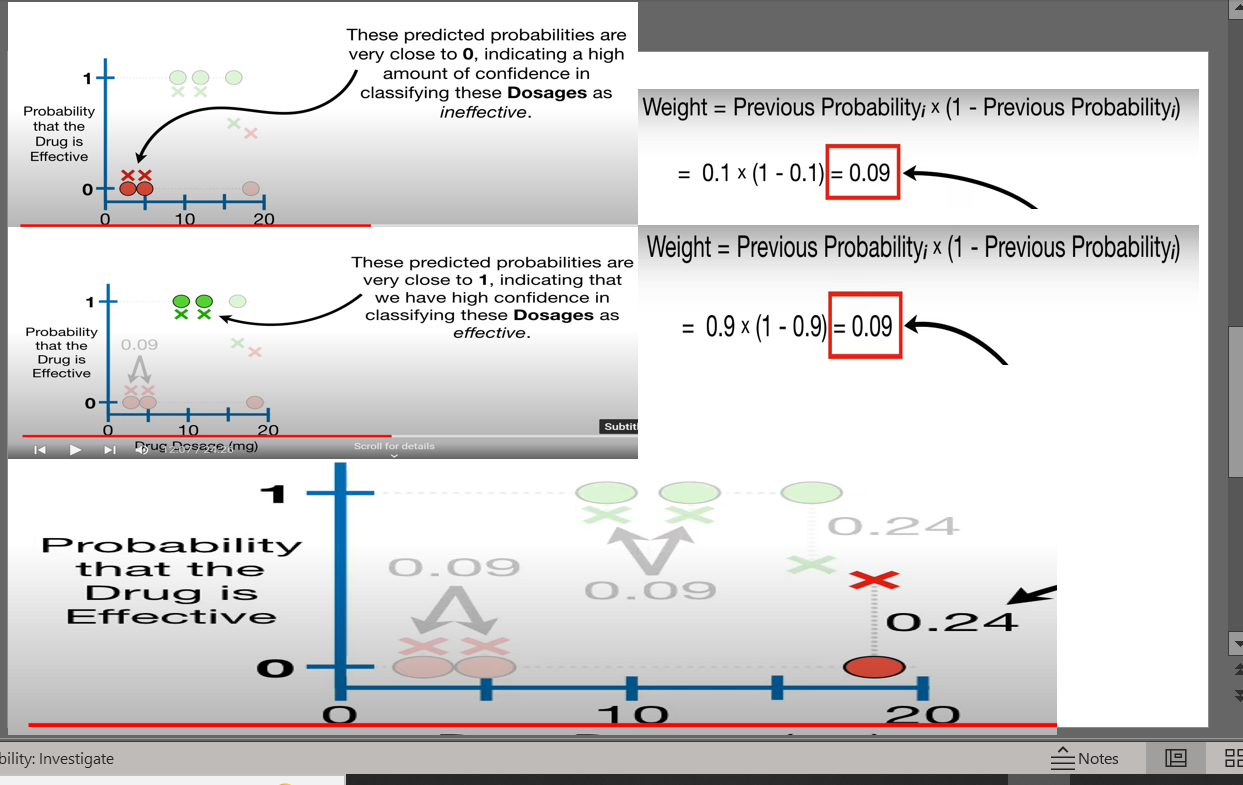

#### <br></br>Instead of using equal quantiles XGBoost tries to make qunatiles that have similar sum of weights


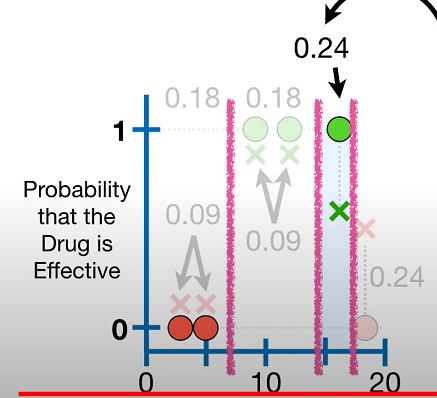

<br></br>
By dividing the observations into quantiles where the sum of weights are similar, we split the two observations with low confidence into seperate bins. So the advantage of weighted quantile sketch is that we get smaller quantile when we need them.

<br></br>

### 4. Sparsity - Aware Split Finding

Sparsity-Aware Split Findings tells us how to build trees with missing values according to their Gain of different combinations of non-missing values together. It tell show how to deal with new observations when thre is a missing value.

### 5. Cache - Aware Access

If you want your program to run really fast, the goal is to maximize what you can do with the Cache Memory(fastest).


So XGBoost puts the Gradients and Heissens in the Cache so that it can rapidly calculate Similarity score and Output values.

### 6. Blocks for Out-of-Core Computation


When the dataset is too large for the Cache and Main Memory, some of it has to be stores in Hard Drive. By spending a little bit of CPU time uncompressing the compressed data, we can avoid spending a lot of time accessing the hard drive. XGBoost uses Sharding if there is mor etha one Hard drive available for Storage to speed up disk access.  

# SESSION 2 : XGBoost Regression

https://www.youtube.com/watch?v=gmp2tS2joaA&t=16s


notebook : https://drive.google.com/file/d/17uGCjrDNfTLF7lYloXgIKDmkrlpBZyuI/view

### How XGBoost is different from decision Trees?

The trees used by XGBoost are a bit different than traditional decision trees. They are called __CART trees (Classification and Regression trees)__ and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. 

After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.

### Necessities for XGBoost:


- <span class="girk">Numeric features should be scaled


- <span class="girk">Categorical features should be encoded</span></span>

- XGBoost Regression works just like Gradient Boosting Algorithm.


- Calculating mean as output of 1st model, then creating subsequent decions tree and trying the predict the residuals of each model.


- But there is a major difference in XGBoost as the decision trees used here is different from the decision trees used in Gradient Boosting.



- These deciosn trees doesnot function based on gini impurity or entropy.
 

## Steps in XGBoost Regression: (Using Exact Greedy Algorithm)

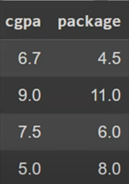

### **Step 1 : Mean will be ouput of first model**:  


1. Start with an initial prediction for all instances. In regression tasks, this is typically the mean of the target values.


2. Compute the initial residual (package - mean of package column).

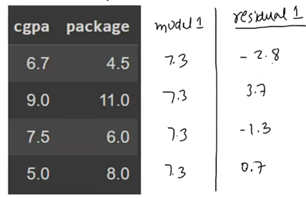

### Step 2 : Train 1st decision tree on cgpa and residual of 1st model : 

- we don't use vanilla decision trees here which work on gini impurity / entropy


- we will create a leaf node with all the residuals from 1st model

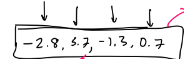

- now will calculate __Root Similarity Score (SS)__

$$SS = \frac{(Sum\;of\;residuals)^2}{number\;of\;residual\;+\;\lambda}$$

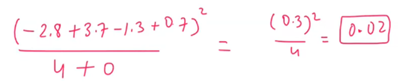

- <span class="mark"> __$\lambda$ is a regularisation parameter which is 0 here.__</span>

### Lambda $(\lambda)\;$ is a Regularization Prameter, which means it is intended to reduce the prediction's sensitivity to individual observations.


- __we will split the residuals__ to see if we can increase the similarity score


- __Splitting criteria :__<br></br>
    - rearrange the input column from increasing order.<br></br>
    - calculate average between each rows.<br></br>
    - These will be the __Splitting criterias :__
    

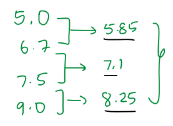

    
- Now we will split the residuals based on the splitting criterias 

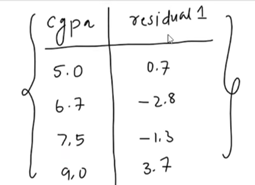

### **Splitting all residuals based on splitting criteria (average btwn 2 data row) :**


- first we split the residuals on __5.85__ and calculate the __similarity score left ($SS_L$) and similarity score left ($SS_R$)__. Then we calculate the __overall gain due to the split__.


- Then  we split the residuals on __7.1__ and calculate the __$SS_L$ and $SS_R$__. Then we calculate the __overall gain due to the split__.


- Finally  we split the residuals on __8.25__ and calculate the __$SS_L$ and $SS_R$__. Then we calculate the __overall gain due to the split__.

- same similarity formula will be used :


$$SS = \frac{(Sum\;of\;residuals)^2}{number\;of\;residual\;+\;\lambda}$$

##### <center>Root Similarity Score here was 0.02

- We select the Splitting criteria where __Gain is the highest__

### $$Gain\;=\;\;\big(\text{Similarity}_{\text{Left}}\;+\;\;\text{Similarity}_{\text{Right}}\big)\;-\;\text{Root}_{\text{Similarity}}$$

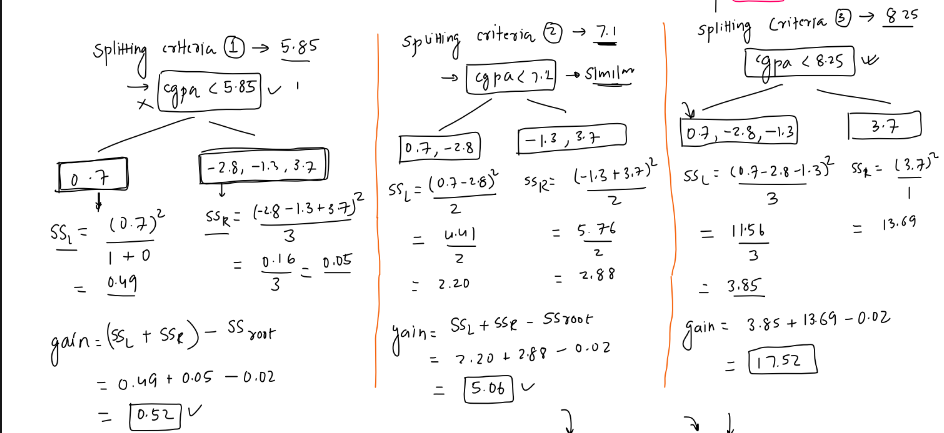

### Note: When residual cancel out each other then the Similarity score is relatively less, whereas when there is only 1 point in the leaf, the similarity score is very large. This happens due to higher denominator

#### Split in the data will be done on cgpa = 8.25 

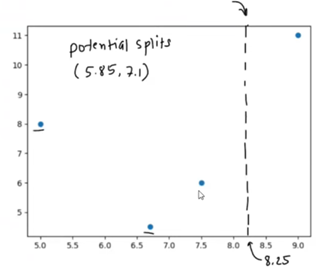

### Step 2 : For the next Decision Tree the root node will be cgpa < 8.25. 

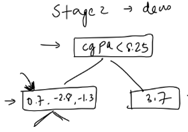

- 2nd level split will be decide between cgpa < 5.85 or cgpa < 7.1


- All the residuals will be divided accordingly


- we will calculate $$SS_{root}\;=\;\frac{\big(0.7 + (-2.8) + (-1.3)\big)^2}{3}  = 3.85$$

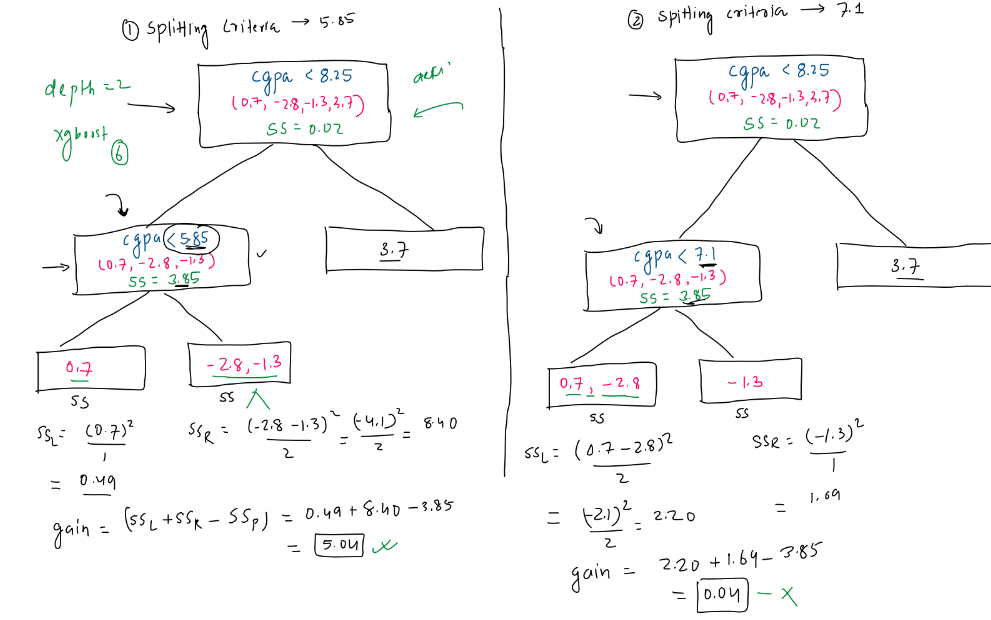

### Final decision tree for max_depth = 2 and calculate output value for each leaf node : 

#### Output Value:


$$Output\;Value\;=\;\frac{Sum\;of\;residuals}{number\;of\;residual\;+\;\lambda}$$


__It is different from Similarity Score as we are not squaring the sum of residuals__

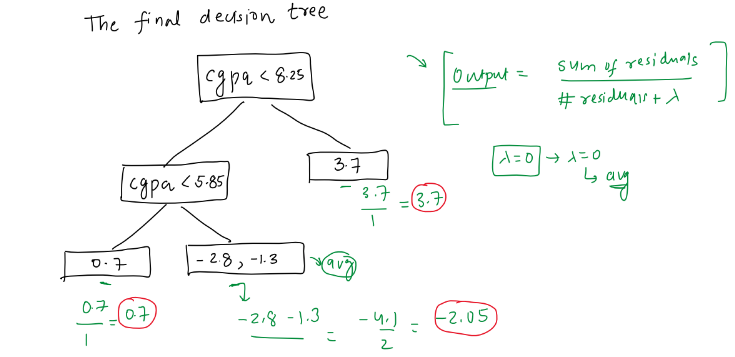

### Stage 2 : Stage 1 output + ($\eta$  * Stage 2 output values)

learning rate will be __$\eta$ = 0.3__,  which will be multiplied to decision tree2 outputs : 


- 7.3 was the mean i.e ouput of 1st model

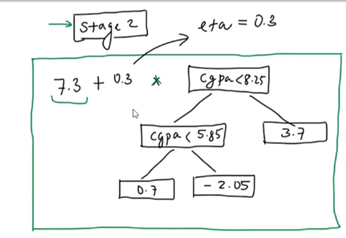

### Final output

- 1st point 6.7 cgpa will fall in the -2.05 leaf node. so overall calculation = 7.3  + (0.3 * -2.05) = 6.69



- 2nd point 9.0 cgpa will fall in the 3.7 leaf node. so overall calculation = 7.3  + (0.3 * 3.7) = 8.41



- Similarly we will calculate output from model2 for 3rd and 4th points

### Finally we will calculate the residuals of model 2 = package - model 2 predictions :

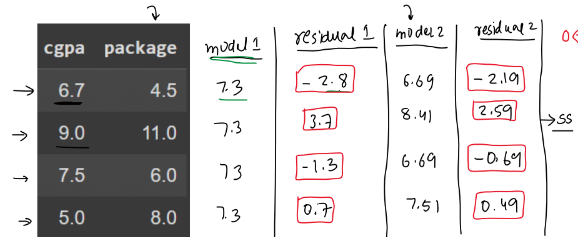

### For stage 3 we will create another decision tree between cgpa and residual2.

Combine output of model 1 + ($\eta$ * output of model 2) + ($\eta$ * output of model 3)

### Like This we will create more trees and get more lesser residuals

- For trees in Stage 3, we will start by caculating root similarity score with the residual2


- Splitting all residuals based on splitting criteria (average btwn 2 data row) i.e (5.85, 7.1, 8.25)

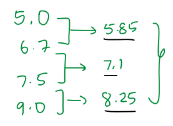

    
- Now we will split the residuals based on the splitting criterias 


- We will repeat the steps done for Decision Tree 1 i.e Model 2

## NOTE : $\lambda$ (lambda) is a Regularization parameter and when $\lambda>0$ it results in more pruning, by shrinking the similarity score and it results in smaller Output values for the leaves.

# SESSION 3 : XGBoost Classification

https://www.youtube.com/watch?v=mELtxVUNNrw


notebook : https://drive.google.com/file/d/18It-0bZiSdjTDONkfmBUXqdbRHn3ZUss/view

**For XGBoost classification we will use log of odds instead of mean.**

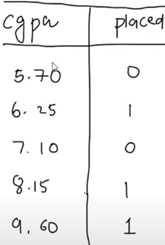

## Stage 1 :

### $$\text{log of odds} = log \Big(\frac{p}{1-p}\Big)$$

where p is probability of getting palced i.e. $\;\;\frac{\text{number of 1's}}{\text{Total number of rows}}$

$$p\;=\;\frac{3}{5}$$


$$\text{log of odds} = log\;\Big(\frac{\frac{3}{5}}{\frac{2}{5}}\Big)\;=\;log \frac{3}{2}\;=\;log_{e} 1.5 = 0.405$$

### Output of model 1:

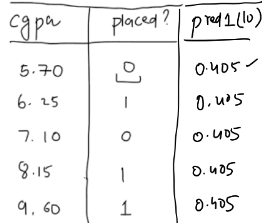

### We need to convert log of odd into probability and subtract with placed column

### $$\text{log of odds to probability conversion} = \frac{e^{\text{log of odds}}}{1 + e^{\text{log of odds}}}$$


$$\text{where, log of odds = ouput of model 1 = 0.405}$$


$$p=\frac{e^{0.405}}{1 + e^{0.405}} = 0.60$$

#### calculate pseudo residual res1 = placed - pred1(prob)

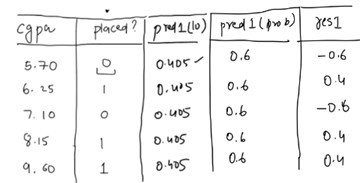

## Stage 2 : Model 2(decision tree)

#### 1. We will take cgpa column and res1 column for the new model

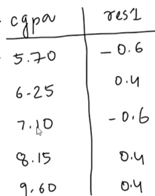

#### 2. Sort data based on cgpa column

#### 3. create a leaf node with all the residuals and calculate the  similarity score


$$\text{Similarity Score}\;(SS)\;=\;\frac{\sum (Residual_i)^2}{\sum\;[Previous\;Probability_{i}\;*\;(1\;-\;Previous\;Probability_{i})]\;+\;\lambda}$$


<br></br>
- previous probability here will be output of model 1 (pred1 prob) = 0.6




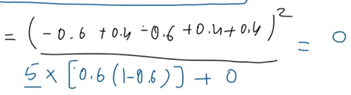


#### <center>similarity score (SS) = 0

#### 4. Split the residuals based on splitting criteria and maximize similarity score : mean of 2 consecutive rows

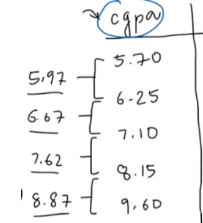

##### taking 1st splitting criteria 5.97

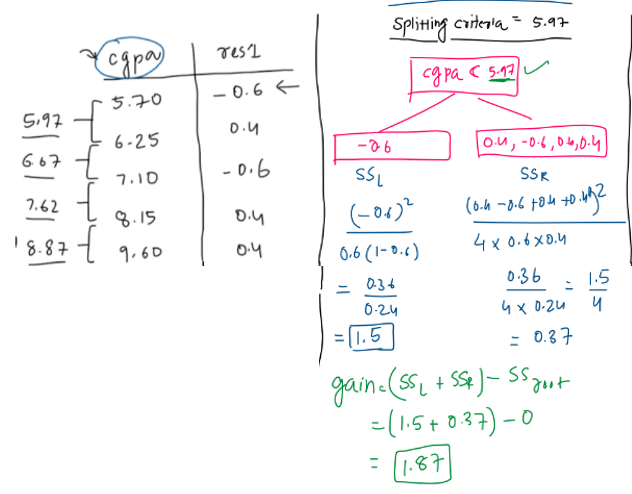

##### taking 2nd splitting criteria  6.67 :

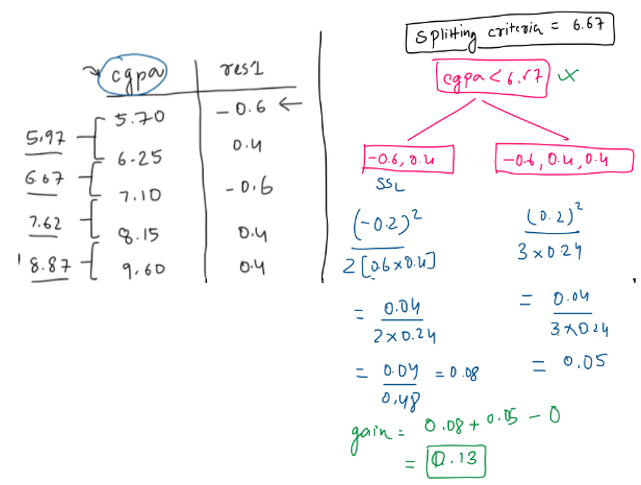

##### taking 3rd splitting criteria 7.62 :

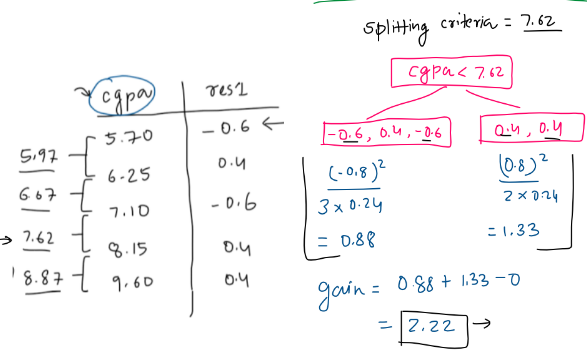

##### taking 3rd splitting criteria 8.87 :

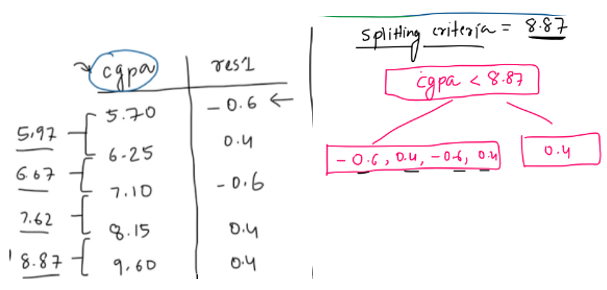

- We select the Splitting criteria where __Gain is the highest__

### $$Gain\;=\;\;\big(\text{Similarity}_{\text{Left}}\;+\;\;\text{Similarity}_{\text{Right}}\big)\;-\;\text{Root}_{\text{Similarity}}$$

#### <center>Gain is maximum for criteria = 7.62

### calculating output for Stage 2 model : 


$$Output\;=\;\frac{\sum Residual_i}{\sum\;[Previous\;Probability_{i}\;*\;(1\;-\;Previous\;Probability_{i})]\;+\;\lambda}$$

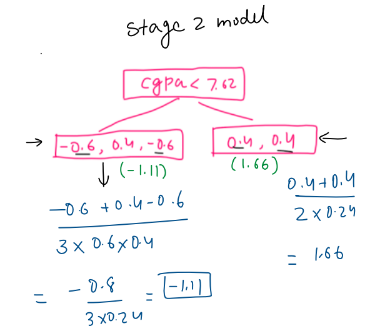

### we will calculate pred 2(log odds) according to model1 + $\eta$ * model2 output

#### <center>ouput from model1 was 0.405

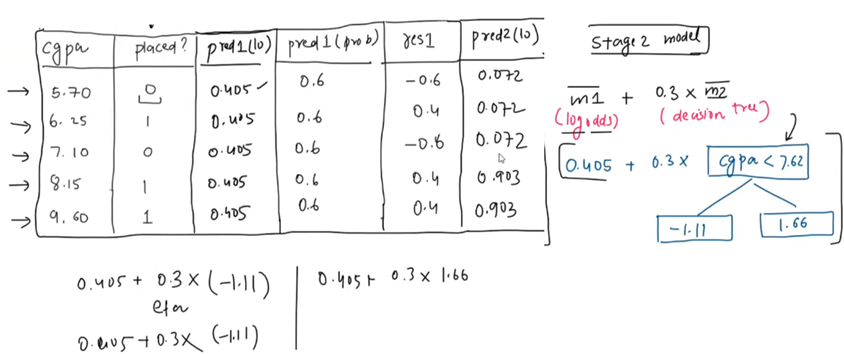

### converting pred2 (log of odds) into pred2(probability) and residual2 (subtracting with cgpa) : 

### $$\text{log of odds to probability conversion} = \frac{e^{\text{log of odds}}}{1 + e^{\text{log of odds}}}$$

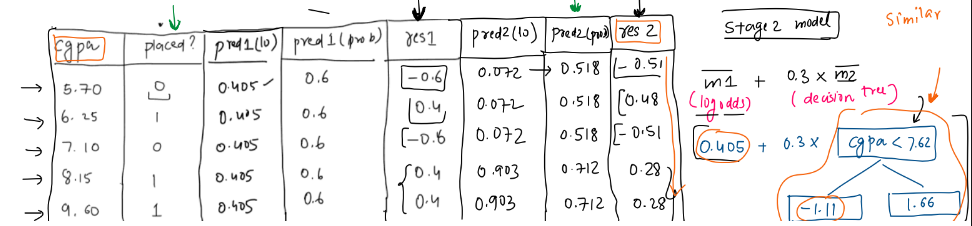

## Stage 3 : build Dt2 model with cgpa and res2 

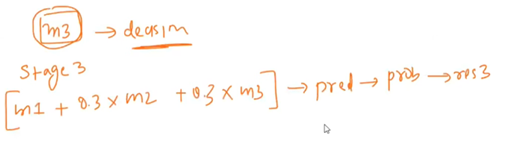

#### we will keep building more dt models until the residual becomes 0

# SESSION 4 : Complete Maths behind XGBoost

https://www.youtube.com/watch?v=0Eo-_5bfers


notebook : https://drive.google.com/file/d/11Qx05XC6vUNvG5LvalWKSlNwY2knuNcr/view

# SESSION 1 : ADVANCE XGB : Revision

notebook : https://drive.google.com/file/d/1FCJc8HDEY3LxWPkrHejcWrRxyIHudECC/view

### If we focus more on decreasing Loss, we tend to overfit.

### Regularization helps decreasing Loss and overfitting.

- LOSS function controls - Bias


- Regularization controls the Variance


That's why we can do Bias Variance Trade off


#### NOTE : regularization can only be applied on Parametric models (Linear Models, Neural Networks)

### Objective Function = LOSS Function (optimization function) L$(\theta)$ + Regularization $\omega (\theta)$

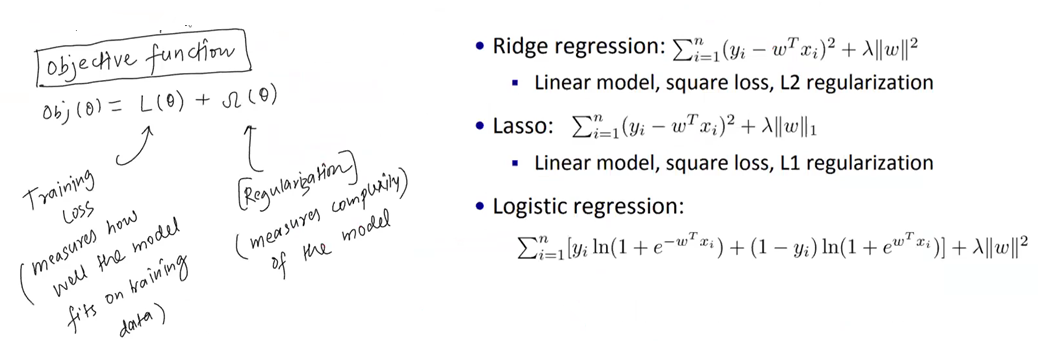

### Difference between Gradient Boosting and XGBoost:

- Gradient Boosting works on additive stage modelling with decion trees.


- XGBoost works on additive stage modelling + Regularization


- XGBoost's Loss function by default has regularization term in it

### XGBoost $\longrightarrow $Merges Stage wise Additive Models (tree based models) + Regularization

## XGBoost Objective Function :

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that is widely used for classification and regression tasks. It is based on the gradient boosting framework. The objective function in XGBoost is designed to optimize both the prediction accuracy and the complexity of the model

### 1. General Objective Function

The objective function in XGBoost is composed of two parts: the loss function $ L $ and a regularization term $ \Omega $.

$$\text{Obj}(\theta) = L(\theta) + \Omega(\theta)$$

- $ L(\theta) $ is the training loss function, which measures how well the model fits the training data.


- $ \Omega(\theta) $ is the regularization term, which penalizes the complexity of the model to avoid overfitting.

### 2. Training Loss Function

For a given dataset with $ n $ samples and predictions $ \hat{y}_i $, the training loss function $ L $ is defined as the sum of a differentiable convex loss function $ l $ over all training examples:

$$L(\theta) = \sum_{i=1}^{n} l(y_i, \hat{y}_i)$$

Common choices for $ l $ are:

- **Regression:** Mean Squared Error (MSE), $$ l(y_i, \hat{y}_i) = (y_i - \hat{y}_i)^2 $$


- **Classification:** Log Loss for binary classification, $$ l(y_i, \hat{y}_i) = -[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

### 3. Regularization Term

The regularization term $ \Omega $ controls the complexity of the model. In XGBoost, it typically includes the $ L_1 $ and $ L_2 $ regularization on the leaf weights and the number of leaves in the trees:

$$\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2$$



- $ T $ is the number of leaves in the tree.


- $ w_j $ is the weight of the $ j $-th leaf.


- $ \gamma $ and $ \lambda $ are regularization parameters.

### 4. Objective Function for Additive Training

XGBoost builds the model in an additive manner, adding one tree at a time. The prediction at the $ t $-th iteration is:

$$\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + f_t(x_i)$$

where $ f_t $ is the function for the new tree. The objective function at the $ t $-th iteration becomes:

$$\text{Obj}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^{t} \Omega(f_k)$$

### 5. Taylor Expansion for Approximation

##### it is very difficult to optimise the objective function that why we use taylor series to diffferentiate


To optimize the objective function, XGBoost uses a second-order Taylor expansion to approximate the loss function. The expansion around the current prediction $ \hat{y}_i^{(t-1)} $ is:

$$l(y_i, \hat{y}_i^{(t)}) \approx l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2$$

where:

- $ g_i = \frac{\partial l(y_i, \hat{y}_i)}{\partial \hat{y}_i} $ is the first derivative of the loss function.


- $ h_i = \frac{\partial^2 l(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} $ is the second derivative of the loss function.

The objective function becomes:

$$\text{Obj}^{(t)} \approx \sum_{i=1}^{n} \left[ l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 \right] + \Omega(f_t)$$

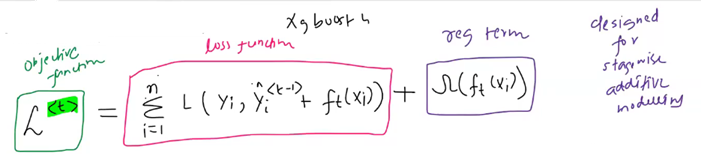

### 6. Optimizing the Objective Function

To find the best $ f_t $, we need to minimize the approximated objective function. For a tree model, $ f_t(x) $ represents the leaf weights $ w_j $. The objective function can be rewritten as:

$$\text{Obj}^{(t)} \approx \sum_{j=1}^{T} \left[ \left( \sum_{i \in I_j} g_i \right) w_j + \frac{1}{2} \left( \sum_{i \in I_j} h_i + \lambda \right) w_j^2 \right] + \gamma T$$

where $ I_j $ is the instance set of leaf $ j $. To minimize the objective, we take the derivative with respect to $ w_j $ and set it to zero:

\$$w_j = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda}$$

The optimal leaf weight $ w_j $ is thus derived. 

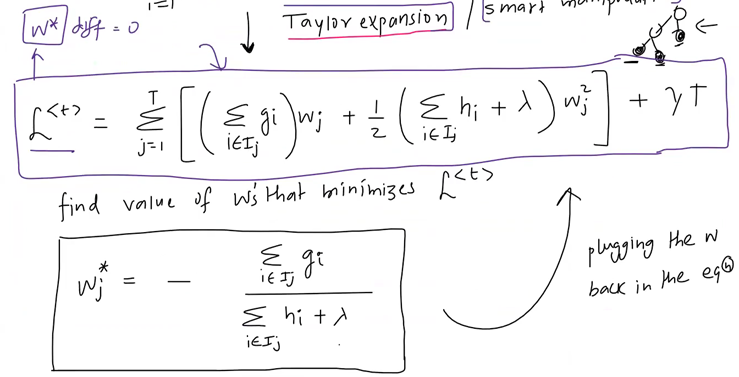

### 7. Gain Calculation

The gain from splitting a node into two leaves is calculated as:

$$\text{Gain} = \frac{1}{2} \left( \frac{(\sum_{i \in I_L} g_i)^2}{\sum_{i \in I_L} h_i + \lambda} + \frac{(\sum_{i \in I_R} g_i)^2}{\sum_{i \in I_R} h_i + \lambda} - \frac{(\sum_{i \in I} g_i)^2}{\sum_{i \in I} h_i + \lambda} \right) - \gamma $$

where $ I_L $ and $ I_R $ are the instance sets of the left and right child nodes, respectively.

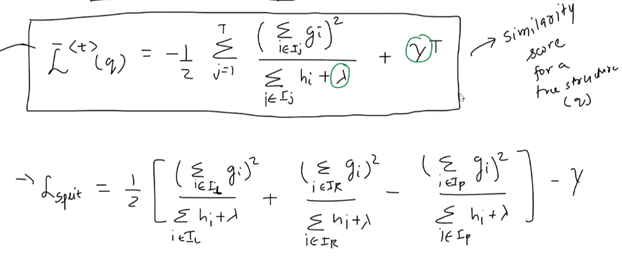

### Summary

XGBoost's objective function combines a training loss and regularization term to ensure model accuracy and complexity control. The use of a second-order Taylor expansion allows efficient optimization of the objective function. This combination of techniques makes XGBoost both powerful and efficient for various machine learning tasks.

# SESSION 2 : ADVANCE XGB : XGBoost Regularization

code : https://colab.research.google.com/drive/1LA93NSEyfLhjwMTVHy5o7sbU97mfhLdt?usp=sharing


notebook : https://drive.google.com/file/d/1yvsTgKBmqgwnAswr15lagQe8d9UJGnlE/view

## Gradient Boosting Algorithm vs XGBoost Algorithm

### Gradient Boosting Algorithm

**1. Basic Concept:**
- **Gradient Boosting** builds models sequentially, where each new model tries to correct the errors of the previous model. It uses the gradient of the loss function to make adjustments to the model.



**2. Components:**
- **Loss Function:** Measures how well the model is performing.
- **Weak Learners:** Typically decision trees, which are built sequentially.
- **Additive Model:** Combines the predictions of multiple weak learners to create a strong learner.



**3. Procedure:**
1. **Initialization:** Start with a simple model, often a mean prediction.
2. **Iterative Process:**
   - Calculate the pseudo-residuals (the gradient of the loss function).
   - Fit a new model to the pseudo-residuals.
   - Update the current model by adding the new model to it.
3. **Repeat:** Until the number of iterations (trees) is reached or improvement stops.



**4. Regularization:**
- Basic gradient boosting does not include regularization techniques explicitly. Overfitting is usually controlled by limiting the depth of the trees and the number of trees.

### XGBoost Algorithm

**1. Basic Concept:**
- **XGBoost (Extreme Gradient Boosting)** is an optimized and enhanced version of the gradient boosting algorithm. It includes additional features for performance and scalability.



**2. Components:**
- **Loss Function:** Same as in gradient boosting, but with the addition of regularization terms.
- **Regularization:** Adds $L_1$ (Lasso) and $L_2$ (Ridge) regularization terms to the objective function to control the complexity of the model.
- **Tree Pruning:** Uses a more sophisticated algorithm to prune trees and avoid overfitting.



**3. Procedure:**
1. **Initialization:** Same as in gradient boosting.
2. **Iterative Process:**
   - Calculate the gradient (first derivative) and the Hessian (second derivative) of the loss function.
   - Use both gradient and Hessian to fit a new model, which provides a more accurate approximation.
   - Update the current model.
3. **Repeat:** Until the number of iterations (trees) is reached or improvement stops.



**4. Advanced Features:**
- **Parallelization:** XGBoost can build trees in parallel, leading to faster training times.
- **Sparsity Awareness:** Efficiently handles sparse data.
- **Cross-Validation:** Built-in support for cross-validation during training.
- **Tree Pruning:** Uses a max-depth parameter and other techniques to avoid overfitting.
- **Custom Objective and Evaluation Functions:** Allows users to define custom loss functions and evaluation metrics.
- **Handling Missing Values:** Automatically learns the best way to handle missing values during training.

## Difference between Gradient Boosting and XGBoost:

- Gradient Boosting works on additive stage modelling with decion trees.


- XGBoost works on additive stage modelling + Regularization


- XGBoost's Loss function by default has regularization term in it

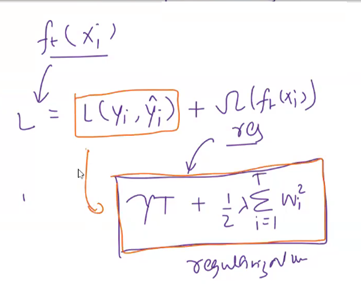

1. **Regularization:**
   - **Gradient Boosting:** Basic form, regularization typically done manually through parameter tuning.
   - **XGBoost:** Explicit regularization terms ($L_1$, $L_2$) in the objective function.



2. **Optimization:**
   - **Gradient Boosting:** Uses only the gradient of the loss function.
   - **XGBoost:** Uses both the gradient and the Hessian (second derivative) for optimization.



3. **Performance:**
   - **Gradient Boosting:** Slower due to sequential tree building.
   - **XGBoost:** Faster with parallel processing and efficient memory usage.



4. **Overfitting Control:**
   - **Gradient Boosting:** Manually controlled by tuning the number of trees and tree depth.
   - **XGBoost:** Advanced techniques like tree pruning, regularization terms, and handling of missing values.



5. **Advanced Features:**
   - **Gradient Boosting:** Basic features.
   - **XGBoost:** Advanced features like parallelization, sparsity awareness, and built-in cross-validation.

In summary, while both algorithms are based on the same fundamental principle of gradient boosting, XGBoost includes numerous enhancements and optimizations that make it more powerful, efficient, and suitable for large-scale and complex datasets.

## In XGBoost split is done based on Similarity Scores and highest Gain

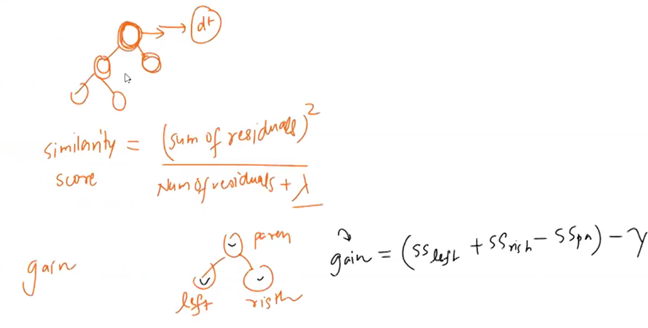

### <center>$\gamma$ is a Regularization term

- In normal decision trees, output = average of all values in the leaf node but in xgboost output formula is diiferent

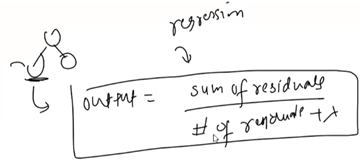

## Ways to reduce overfitting in XGBoost : 

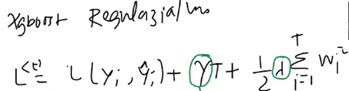

#### <center>**Regularization is a way to prevent overfitting by simplifying the model**

1. __Reduce the number of estimators__


2. __Use Simple trees (max_depth and pruning)__


3. __Random Sampling (row-wise sampleing or column-wise sampling)__


4. __Gradual correcting the error (shrinkage : using learning rate)__

## Pre-pruning vs Post Pruning

In XGBoost, pruning can be categorized into pre-pruning (restricting tree growth during construction) and post-pruning (removing branches after the tree is fully grown). However, XGBoost primarily focuses on pre-pruning techniques, as it typically builds trees in a way that avoids the need for extensive post-pruning. Here are the key pre-pruning and post-pruning parameters in XGBoost:

### Pre-Pruning Parameters

1. **max_depth:**
   - **Description:** Limits the maximum depth of the tree.
   - **Impact:** Controls the growth of the tree by capping the number of splits from the root to the deepest leaf.

2. **min_child_weight:**
   - **Description:** The minimum sum of instance weight (hessian) needed in a child.
   - **Impact:** Prevents the model from creating nodes that do not have enough samples. Helps in controlling overfitting.

3. **gamma (min_split_loss):**
   - **Description:** Minimum loss reduction required to make a further partition on a leaf node.
   - **Impact:** Controls whether a given node will be split based on the expected reduction in the loss function. Higher values lead to fewer splits.

4. **max_leaves:**
   - **Description:** Maximum number of terminal nodes or leaves in a tree.
   - **Impact:** Limits the size of the tree by restricting the number of leaves.

5. **max_delta_step:**
   - **Description:** Maximum delta step we allow each tree's weight estimation to be.
   - **Impact:** Used to help with convergence in logistic regression when the class is extremely imbalanced.

6. **subsample:**
   - **Description:** Fraction of the training data to be randomly sampled for each tree.
   - **Impact:** Reduces overfitting by introducing randomness into the model. Similar to bagging in Random Forests.

7. **colsample_bytree, colsample_bylevel, colsample_bynode:**
   - **Description:** Fraction of features to be randomly sampled for constructing each tree, for each level, and for each node, respectively.
   - **Impact:** Reduces overfitting by making the model more robust and preventing it from relying too heavily on any one feature.

### Post-Pruning Parameters

XGBoost primarily utilizes pre-pruning techniques. However, some aspects of post-pruning can be inferred or simulated through specific parameters or advanced configurations:

1. **eta (learning_rate):**
   - **Description:** Step size shrinkage used to prevent overfitting.
   - **Impact:** While not a direct pruning parameter, reducing the learning rate can be considered a form of regularization that impacts the overall complexity and pruning indirectly.

2. **lambda (L2 regularization term on weights):**
   - **Description:** L2 regularization term on weights.
   - **Impact:** Adds regularization to the objective function, which indirectly influences the complexity of the model and can lead to a form of post-pruning.

3. **alpha (L1 regularization term on weights):**
   - **Description:** L1 regularization term on weights.
   - **Impact:** Similar to lambda, adds regularization to the objective function, impacting model complexity and promoting sparsity.

### Summary

- **Pre-Pruning Parameters:** These directly limit the growth of the tree during its construction, helping to control the model complexity and reduce overfitting. Key parameters include `max_depth`, `min_child_weight`, `gamma`, `max_leaves`, `max_delta_step`, `subsample`, and `colsample_*`.

- **Post-Pruning Parameters:** While XGBoost does not explicitly perform post-pruning, parameters like `eta`, `lambda`, and `alpha` can influence the model in ways that mimic the effects of post-pruning by adding regularization and controlling model complexity.

By tuning these parameters appropriately, one can effectively manage the complexity of XGBoost models, ensuring they are both powerful and generalizable.

## 1. gamma $(\gamma)$ `[default=0, alias: min_split_loss]`

- Gamma is a regularization parameter used in XGBoost to control whether a given node will be split based on the expected reduction in the loss function. 



- Specifically, it specifies the minimum loss reduction required to make a further partition on a leaf node of the tree.

### Reducing Overfitting

1. **Simpler Trees:**
   - By requiring a minimum loss reduction ($\gamma$) for a split to be made, XGBoost avoids creating overly complex trees that fit the training data too closely.
   - This results in simpler trees with fewer nodes, which are less likely to overfit the training data.



2. **Avoiding Noisy Splits:**
   - In the absence of a regularization parameter like $\gamma$, the model might create splits that capture noise in the training data.
   - By setting a higher $\gamma$ value, only splits that provide a substantial improvement are considered, reducing the likelihood of capturing noise.

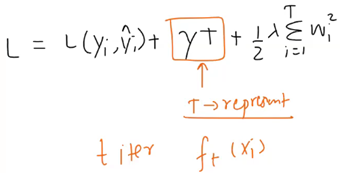

$\gamma$ penalizes T for making to many leaf nodes i.e $\gamma $ acts as __Post Pruning__

### Role of Gamma in Tree Splitting

When building decision trees, each potential split is evaluated based on its contribution to reducing the loss function. The objective function in XGBoost can be written as:

$$\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{T} \Omega(f_k)$$

Where:

- $l(y_i, \hat{y}_i)$ is the loss function.
- $\Omega(f_k)$ is the regularization term for tree $k$.

The regularization term $\Omega(f_k)$ for a tree with $T$ leaves is given by:

$$\Omega(f_k) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2$$

Here, $\gamma$ is used to penalize the number of leaves ($T$).

### How Gamma Works

1. **Loss Reduction Requirement:** 
   - When attempting to split a node, XGBoost calculates the gain, which is the improvement in the objective function from making the split.<br></br>
   - The gain must be greater than $\gamma$ for the split to be made. If the gain is less than $\gamma$, the split is not made, and the node remains as a leaf.

2. **Gain Calculation:**

   - For a potential split, the gain is calculated as follows:
   
   $$\text{Gain} = \frac{1}{2} \left( \frac{(\sum_{i \in I_L} g_i)^2}{\sum_{i \in I_L} h_i + \lambda} + \frac{(\sum_{i \in I_R} g_i)^2}{\sum_{i \in I_R} h_i + \lambda} - \frac{(\sum_{i \in I} g_i)^2}{\sum_{i \in I} h_i + \lambda} \right) - \gamma $$

   Where:<br></br>
   - $I$, $I_L$, and $I_R$ are the instance sets for the parent, left child, and right child nodes, respectively.<br></br>
   - $g_i$ and $h_i$ are the first and second derivatives of the loss function for instance $i$.<br></br>
   - $\lambda$ is another regularization parameter.

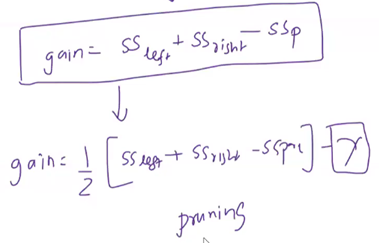

3. **Pruning Nodes:**
   - If the gain from splitting a node is less than $\gamma$, the split is not performed, effectively pruning the tree.<br></br>
   -__Gain is not calculated for leaf nodes, it is calculated for root nodes__<br></br>
   - checking of gain and comparing with gamma with each root node is done from __bottom root nodes to top root nodes__<br></br>
   
   - This prevents the creation of nodes that do not provide significant improvement in the model’s performance, thereby controlling the model complexity.

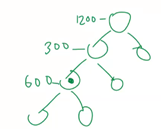

### NOTE : The root node is not pruned on gamma if the child root node of it has significant gain

### Tuning Gamma

- The value of $\gamma$ can be tuned through cross-validation.<br></br>
- __Underfitting :__ Higher values of $\gamma$ lead to more conservative models with fewer splits<br></br>
- __Overfitting :__ lower values of $\gamma$ allow more splits and potentially more complex models.<br></br>
- The optimal value of $\gamma$ balances model complexity and performance on unseen data, helping to achieve the best generalization.<br></br>

In summary, $\gamma$ in XGBoost helps in reducing overfitting by controlling the complexity of the trees. It ensures that only splits that provide significant improvements in the objective function are made, leading to simpler, more generalizable models.

### Code for gamma

In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib

# Generate a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=100, n_features=5, n_informative=2, noise=0.1, random_state=42)

# Train an XGBoost model for regression
model_reg = xgb.XGBRegressor(n_estimators=1, random_state=42)
model_reg.fit(X_reg, y_reg)

# Plot the tree with gain values explicitly shown
xgb.plot_tree(model_reg, num_trees=0, rankdir='LR', importance_type='gain')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Get the detailed dump of the tree, including statistics
tree_dump = model_reg.get_booster().get_dump(dump_format='text', with_stats=True)

# Print the tree dump to see the detailed information, including gain for each node
for tree in tree_dump:
    print(tree)


0:[f1<-0.262043864] yes=1,no=2,missing=1,gain=195253.422,cover=100
	1:[f3<0.212661088] yes=3,no=4,missing=3,gain=83259.0859,cover=40
		3:[f0<-0.966205835] yes=7,no=8,missing=7,gain=3160,cover=22
			7:leaf=-13.8264065,cover=4
			8:[f4<-0.793181777] yes=15,no=16,missing=15,gain=745.734375,cover=18
				15:leaf=-19.1590672,cover=6
				16:leaf=-33.3370285,cover=12
		4:[f3<1.21251106] yes=9,no=10,missing=9,gain=12190.0898,cover=18
			9:[f1<-0.711638093] yes=17,no=18,missing=17,gain=3548.93994,cover=13
				17:[f0<2.01063085] yes=27,no=28,missing=27,gain=835.335449,cover=9
					27:[f3<1.0379864] yes=35,no=36,missing=35,gain=270.443359,cover=8
						35:leaf=-9.86406803,cover=7
						36:leaf=-1.93873334,cover=1
					28:leaf=-0.0295569245,cover=1
				18:[f1<-0.423867702] yes=29,no=30,missing=29,gain=411.380737,cover=4
					29:[f0<0.141550958] yes=37,no=38,missing=37,gain=13.9765625,cover=3
						37:leaf=3.90387368,cover=2
						38:leaf=0.944778621,cover=1
					30:leaf=-2.07688856,cover=1
			10:[f

## 2. max_depth `[default=6]`

In XGBoost, the parameter `max_depth` controls the maximum depth of the individual trees that are built. This parameter is crucial for managing the complexity of the model and thereby plays a significant role in reducing overfitting. 

### Understanding Max Depth

- **Max Depth:** It specifies the maximum number of nodes along the longest path from the root node down to the farthest leaf node.<br></br>
- Setting this parameter limits the growth of the tree, preventing it from becoming too deep and complex.

### NOTE : max_depth is a type of pre pruning

### Why we need max_depth when we have gamma ($\gamma$) ?
> Due to computation, as it is pre-pruning so we don;t need to fully grow a tree and then decide the criteria for pruning

### Role of Max Depth in Tree Building

1. **Control Over Complexity:**
   - A deeper tree can capture more intricate patterns in the data. While this can lead to better performance on the training data, it can also result in the model capturing noise and details that do not generalize well to unseen data.<br></br>
   - By limiting the `max_depth`, we constrain the model to capture only the most significant patterns, reducing the risk of overfitting.
   
   

2. **Balanced Bias-Variance Trade-off:**
   - Shallow trees (with low `max_depth`) tend to have high bias but low variance. They may underfit the training data but perform better on unseen data.<br></br>
   - Deep trees (with high `max_depth`) tend to have low bias but high variance. They may overfit the training data and perform poorly on unseen data.<br></br>
   - A properly set `max_depth` balances this trade-off, achieving a good balance between bias and variance.

### How Max Depth Works in XGBoost

1. **Limiting Node Splits:**
   - During the tree construction process, the algorithm evaluates potential splits at each node.<br></br>
   - If the depth of a node reaches `max_depth`, the algorithm stops further splitting of that node, treating it as a leaf node.



2. **Pruning the Tree:**
   - By setting a `max_depth`, the model inherently prunes the tree to that depth, preventing the creation of additional nodes that may fit the noise in the data.<br></br>
   - This controlled pruning results in simpler, more generalizable models.

### Practical Steps to Tune Max Depth

1. **Start with a Baseline:**
   - Begin with a relatively low value (e.g., 3).<br></br>
   
2. **Perform Cross-Validation:**
   - Evaluate the model using cross-validation, gradually increasing `max_depth` and observing the performance on the validation set.<br></br>
   
3. **Monitor Performance Metrics:**
   - Look for the point where increasing `max_depth` no longer significantly improves validation performance or starts to degrade it.<br></br>
   
4. **Select Optimal Value:**
   - Choose the `max_depth` that offers the best balance between training accuracy and validation performance.

### Summary

- **Max Depth:** Limits the maximum depth of individual trees, controlling the complexity of the model.<br></br>
- **Reduces Overfitting:** By preventing trees from becoming too deep and capturing noise in the data, `max_depth` helps in creating simpler models that generalize better.<br></br>
- **Bias-Variance Trade-off:** Proper tuning of `max_depth` helps achieve an optimal balance between underfitting (high bias) and overfitting (high variance).<br></br>

## 3. min_child_weight `[default=1]`

In XGBoost, the parameter `min_child_weight` is a critical tool for controlling overfitting. It works by setting a threshold for the minimum sum of instance weights (or the Hessian, in the context of the loss function) required to form a new node in the tree. 


#### It is a regularization parameter which helps in Pruning

### COVER : Sum of hessians

In XGBoost, "cover" and "Hessian" are metrics used to evaluate and optimize the performance of the trees during the training process. 

**Every node has some points so it will have Hessian. Hence it will have cover.**

### Cover

- **Definition:** Cover is a metric that measures the total number of instances (data points) that fall into a given leaf or are used in a split.


- **Usage in Splitting:** During the tree-building process, cover is used to assess the quality of a split. Higher cover indicates that more instances are involved in the split, making it statistically more reliable.


- **Interpretation:** In the context of XGBoost, cover can refer to the sum of the instance weights for all instances in a node. It helps in determining how well the splits and nodes are representing the data.

### When we differentiate Loss once we get gradient, When we differentiate it again, we get Hessian

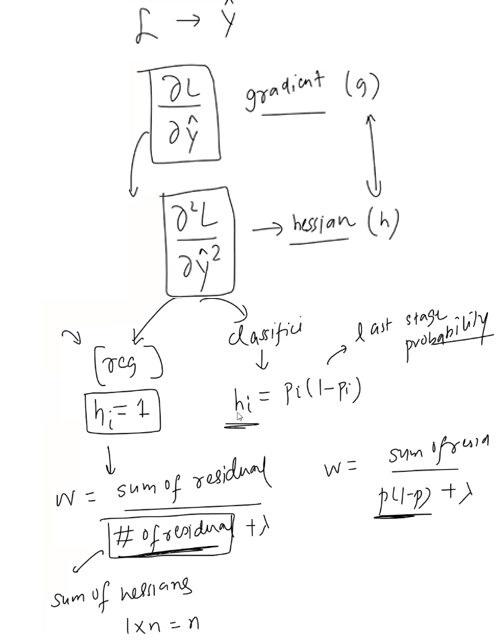

### Hessian

- **Definition:** The Hessian is the second-order derivative of the loss function with respect to the predictions. It measures the curvature of the loss function.


- **Usage in Splitting:** The Hessian is used to improve the accuracy of the gradient boosting process by taking into account the second-order (curvature) information of the loss function. This allows for more precise adjustments of the model parameters.


- **Role in Regularization:** By incorporating the Hessian, XGBoost can achieve better regularization, helping to prevent overfitting by controlling the complexity of the model.


- **Interpretation:** The Hessian is particularly important for XGBoost's optimization algorithm, as it helps in making more informed decisions on the structure of the trees by considering both the gradient (first-order derivative) and the curvature (second-order derivative) of the loss function.

### Summary

- **Cover:** Measures the number of instances or the sum of instance weights in a node or split, used to evaluate split quality.


- **Hessian:** The second-order derivative of the loss function, used to incorporate curvature information for more accurate model updates and better regularization.

By leveraging both cover and Hessian, XGBoost can create more robust and accurate models, making informed decisions on splits and adjustments to minimize the loss function effectively.

### Hessian for regression and classification

In XGBoost, the Hessian is the second-order derivative of the loss function with respect to the model's predictions. It is used to incorporate curvature information, which helps in more accurate and stable model training. The Hessian is essential for both regression and classification tasks, but it differs slightly depending on the type of problem.

#### Hessian in Regression

In regression, the loss function is typically the mean squared error (MSE) or another regression-specific loss function. The Hessian in this context is derived from the second derivative of the loss function with respect to the predictions.

- **Loss Function (MSE):**
  $$
  L(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2
  $$



- **Gradient (First Derivative) with respect to $\hat{y}$:**
  $$
  g_i = \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} = \hat{y}_i - y_i
  $$



- **Hessian (Second Derivative) with respect to $\hat{y}$:**
  $$
  h_i = \frac{\partial^2 L(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} = 1
  $$

In regression, the __Hessian is often constant (equal to 1)__ for the MSE loss function, indicating that the curvature is uniform across all predictions.

#### Hessian in Classification

In classification, particularly binary classification, the loss function is typically the logistic loss or cross-entropy loss. The Hessian in this context reflects the curvature of the loss function, which varies with the prediction probabilities.

- **Loss Function (Logistic Loss):**
  $$
  L(y, \hat{y}) = - y \log(\sigma(\hat{y})) - (1 - y) \log(1 - \sigma(\hat{y}))
  $$
  
  
  where $\sigma(\hat{y})$ is the sigmoid function:
  
  
  $$
  \sigma(\hat{y}) = \frac{1}{1 + e^{-\hat{y}}}
  $$

- **Gradient (First Derivative) with respect to $\hat{y}$:**
  $$
  g_i = \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} = \sigma(\hat{y}_i) - y_i
  $$

- **Hessian (Second Derivative) with respect to $\hat{y}$:**
  $$
  h_i = \frac{\partial^2 L(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} = \sigma(\hat{y}_i) (1 - \sigma(\hat{y}_i))
  $$

In binary classification, the Hessian is $\sigma(\hat{y}_i) (1 - \sigma(\hat{y}_i))$, which depends on the prediction $\hat{y}_i$. This value represents the variance of the predicted probability and is used to adjust the weight updates, providing a more accurate optimization process.

### Summary

- **Regression:**<br></br>
  - **Loss Function:** Mean Squared Error (MSE)<br></br>
  - **Gradient:** $\hat{y}_i - y_i$<br></br>
  - **Hessian:** __Constant value, typically 1 for MSE__<br></br>



- **Classification:**<br></br>
  - **Loss Function:** Logistic Loss (Cross-Entropy)<br></br>
  - **Gradient:** $\sigma(\hat{y}_i) - y_i$<br></br>
  - **Hessian:** $\sigma(\hat{y}_i) (1 - \sigma(\hat{y}_i))$, which varies with the prediction<br></br>

The Hessian plays a crucial role in the optimization process in XGBoost, allowing the algorithm to use second-order information to make more informed and precise updates to the model, thereby improving its performance and stability.

### Understanding `min_child_weight`

- **Definition:** `min_child_weight` specifies the minimum sum of Hessian needed in a child node. If the sum is less than `min_child_weight`, the node will not be split further.<br></br>
- **Default Value:** The default value is typically 1, but it can be adjusted based on the dataset and the problem being solved.

### Role in Reducing Overfitting

1. **Preventing Splits on Small Data Subsets:**
   - **Threshold for Splits:** By setting a minimum threshold for the sum of instance weights, `min_child_weight` ensures that only splits that have a sufficient number of instances (or sufficient total weight) are made. This prevents the model from creating branches that capture noise or outliers in the training data.<br></br>
   - **Example:** If `min_child_weight` is set to 10, a node will only be split if the sum of the instance weights in both child nodes is at least 10. This means very small or insignificant splits are avoided.



2. **Reducing Complexity:**
   - **Simpler Trees:** By avoiding splits on nodes with insufficient instance weights, the resulting trees are simpler and less complex. This simplicity helps in generalizing better to new, unseen data, as the model is less likely to fit noise in the training data.<br></br>
   - **Balanced Trees:** Ensuring that each split has a meaningful amount of data helps in creating more balanced trees, which are easier to interpret and less prone to overfitting.



3. **Controlling Node Creation:**
   - **Significant Splits:** Only splits that provide meaningful information and have enough support in the data are allowed. This leads to nodes that are more representative of the underlying data distribution, enhancing the model's ability to generalize.<br></br>
   - **Avoiding Over-Specificity:** By avoiding splits on small subsets of data, the model does not become too specific to the training data, which helps in maintaining a good bias-variance trade-off.

### Practical Implications

1. **Parameter Tuning:**
   - **Cross-Validation:** The optimal value of `min_child_weight` can be determined using cross-validation. Typically, higher values will lead to more conservative models (less likely to overfit), while lower values allow more splits and complexity.<br></br>
   - **Dataset Specific:** The appropriate value depends on the dataset size and the distribution of the instance weights. For large datasets, a higher value might be suitable, while for smaller datasets, a lower value might be more appropriate.


2. **Impact on Model Performance:**
   - **Training and Test Accuracy:** Higher `min_child_weight` values generally improve the model's performance on the test set by reducing overfitting, though it might slightly decrease training accuracy.<br></br>
   - **Training Time:** Restricting unnecessary splits can also reduce training time, as fewer nodes need to be evaluated and created.

### Example Scenario

Consider a scenario where you have a dataset with some noisy data points. Without setting a `min_child_weight`, XGBoost might create splits based on these noisy points, leading to complex trees that fit the training data very well but perform poorly on the test set. By setting a higher `min_child_weight`, you ensure that splits are only made when there is sufficient data to support them, leading to simpler and more generalizable models.

### min_child_weight for regression:


__For a particular node, Minimum number of data points (cover) required for further split.__



__Heissian for each point is 1 for regression__

### min_child_weight for classification :

$$\text{heissian}\;(h_i) = p_i (1 - p_i)$$

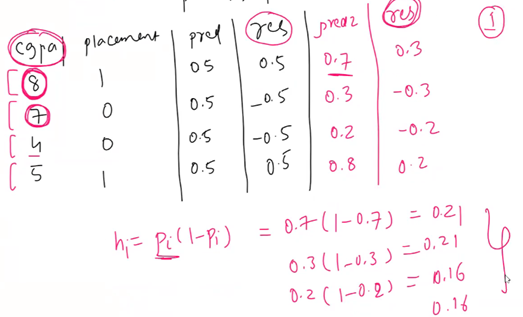

### Max hessian for a point can be 0.25

## 4. num_estimators

In XGBoost, the `num_estimators` parameter, which specifies the number of boosting rounds or trees to be built, can impact overfitting in a nuanced way. Here’s how it affects model performance and overfitting:

### Understanding `num_estimators`

- **Definition:** `num_estimators` determines the number of boosting rounds (i.e., the number of trees) that are built in the XGBoost model.
- **Default Value:** There is no fixed default value; it can be set based on the specific problem and dataset.

### Impact on Overfitting

1. **Training vs. Validation Performance:**
   - **Overfitting with Too Many Trees:** As `num_estimators` increases, the model becomes more complex because each additional tree learns from the residuals of the previous trees. If `num_estimators` is set too high, the model might overfit the training data, capturing noise and minor fluctuations that do not generalize well to new, unseen data.
   - **Early Stopping:** To mitigate overfitting, `num_estimators` is often tuned with techniques like early stopping, where training is halted if the validation performance does not improve after a certain number of rounds. This prevents the model from continuing to learn unnecessary details.

2. **Bias-Variance Trade-off:**
   - **Increasing `num_estimators`:** Initially, increasing `num_estimators` typically reduces bias, as the model learns more about the training data. However, if it goes beyond an optimal point, it increases variance by fitting the training data too closely.
   - **Optimal Number of Trees:** There is a balance to be found. A higher number of trees might improve model accuracy up to a certain point, but beyond that, it may lead to overfitting. Finding the optimal number of trees requires careful tuning and validation.

3. **Learning Rate Interaction:**
   - **Learning Rate (eta):** `num_estimators` interacts with the learning rate (`eta`). A smaller learning rate requires more boosting rounds to converge to an optimal model. If `eta` is set low, `num_estimators` needs to be higher to achieve good performance, but it also necessitates careful monitoring to avoid overfitting.
   - **Trade-off:** Lower `eta` with a higher `num_estimators` can be beneficial, but it requires more training rounds and careful tuning to avoid overfitting.

### Practical Considerations

1. **Cross-Validation:**
   - **Tuning:** The optimal value of `num_estimators` is usually determined through cross-validation. By evaluating the model on a validation set, you can find the number of trees that balances training performance and generalization.
   - **Early Stopping:** This technique involves splitting the data into training and validation sets and using a validation set to monitor the model’s performance. Training stops when performance on the validation set no longer improves.

2. **Impact on Training Time:**
   - **Training Duration:** Increasing `num_estimators` increases training time and computational cost. It’s essential to balance the number of trees with the available computational resources and time constraints.

3. **Model Complexity:**
   - **Too Many Trees:** While more trees can improve performance up to a point, excessively high values might lead to unnecessarily complex models that overfit the training data. Regularization parameters and early stopping can help mitigate this.

### Example Scenario

Imagine you are training an XGBoost model with `num_estimators` set to a very high value, such as 1000. Initially, the model might show improvement in training accuracy, but if not monitored, it may start to overfit, where the training accuracy continues to improve while the validation accuracy stagnates or decreases. By using early stopping with a validation set, you can halt training at the optimal point, avoiding excessive overfitting and ensuring a model that generalizes well.

### Summary

- **Role of `num_estimators`:** Controls the number of boosting rounds or trees in the model. More trees generally improve performance up to a point but can lead to overfitting if not managed carefully.
- **Overfitting Risk:** Too many trees can lead to overfitting by capturing noise in the training data. The balance is found through tuning and validation techniques.
- **Cross-Validation and Early Stopping:** These are crucial for finding the optimal number of trees and preventing overfitting.
- **Interaction with Learning Rate:** Lower learning rates often require more trees to achieve good performance, necessitating careful adjustment.

By appropriately tuning `num_estimators` and using techniques like early stopping and cross-validation, you can effectively manage the complexity of your XGBoost model and reduce the risk of overfitting.

## 5. early stopping 

Early stopping is a technique used to prevent overfitting in machine learning models, including XGBoost. It involves halting the training process before the model becomes too complex and begins to overfit the training data. Here’s how early stopping helps reduce overfitting in XGBoost:

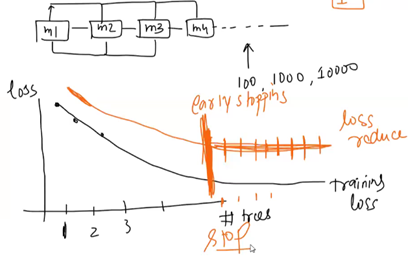

### How Early Stopping Works

1. **Training and Validation Sets:**
   - **Separate Sets:** Early stopping requires splitting the dataset into at least two parts: a training set and a validation set. The model is trained on the training set, and its performance is monitored on the validation set.
   - **Monitoring:** During training, the performance of the model on the validation set is regularly evaluated to track how well it generalizes to unseen data.

2. **Stopping Criteria:**
   - **Performance Monitoring:** After each boosting round (or a specified number of rounds), the model's performance on the validation set is assessed. Common metrics include accuracy, loss, or any other relevant evaluation metric.
   - **Patience Parameter:** Early stopping is controlled by a "patience" parameter, which specifies the number of consecutive boosting rounds that the model’s performance can fail to improve on the validation set before stopping the training.

3. **Stopping the Training:**
   - **Improvement Threshold:** If the performance on the validation set does not improve for a number of rounds specified by the patience parameter, training is halted. This prevents the model from continuing to learn unnecessary details from the training data.

### Benefits of Early Stopping in Reducing Overfitting

1. **Prevents Overfitting:**
   - **Avoids Excessive Learning:** By halting training when the model starts to overfit (i.e., when validation performance plateaus or worsens), early stopping ensures the model does not become too complex.
   - **Generalization:** Stopping early helps in maintaining a model that generalizes well to new data, as it prevents the model from capturing noise or irrelevant details in the training data.

2. **Reduces Training Time:**
   - **Efficiency:** Early stopping can reduce training time by stopping the process once the model reaches a point of diminishing returns. This means fewer boosting rounds and less computational cost.
   - **Resource Management:** It helps in managing computational resources efficiently, as training does not continue unnecessarily beyond the optimal point.

3. **Balances Bias and Variance:**
   - **Optimal Model Complexity:** Early stopping helps in finding a balance between bias and variance by preventing the model from becoming overly complex, which would increase variance and lead to overfitting.
   - **Avoids Overfitting:** It maintains the model complexity at a level where it performs well on both training and validation sets, ensuring better generalization.

### Practical Implementation

1. **Setting Up Early Stopping:**
   - **Validation Set:** Specify a validation set when training the XGBoost model.<br></br>
   - **Patience Parameter:** Set the number of rounds for early stopping (e.g., if patience is set to 10, training will stop if validation performance does not improve for 10 consecutive rounds).<br></br>
   - **Evaluation Metric:** Choose the appropriate evaluation metric to monitor (e.g., accuracy, AUC, log loss).<br></br>



### Summary

- **Early Stopping:** A technique to halt training based on validation performance, preventing overfitting by stopping when further training does not improve validation metrics.
- **Benefits:** Reduces overfitting, decreases training time, and balances bias and variance.
- **Implementation:** Requires a validation set, a patience parameter, and monitoring of evaluation metrics.

By incorporating early stopping into your XGBoost training process, you can achieve models that are better suited for generalization, avoiding the pitfalls of overfitting and unnecessary computational expense.

### Code :

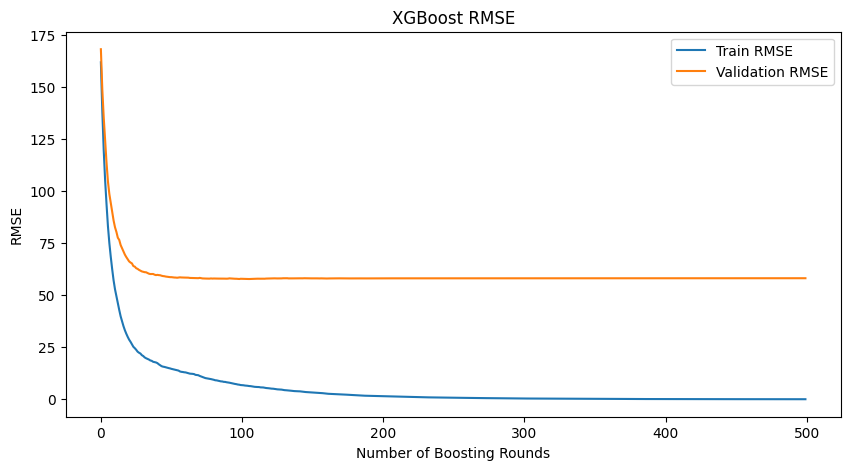

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, eta=0.3, n_estimators=500)

# Fit the model with early stopping
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=False)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Number of Boosting Rounds')
plt.title('XGBoost RMSE')
plt.show()


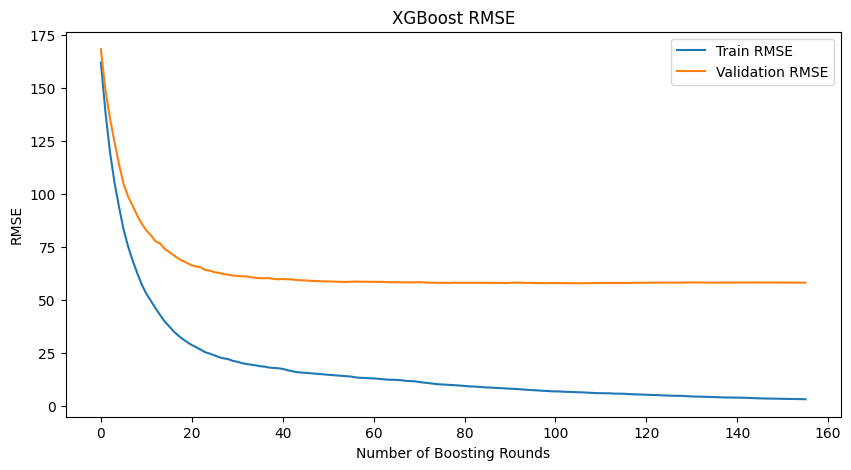

In [14]:
# Define the model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, eta=0.3, n_estimators=500)

# Fit the model with early stopping
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=False,early_stopping_rounds=50)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Number of Boosting Rounds')
plt.title('XGBoost RMSE')
plt.show()


## 6. Shrinkage / learning_rate `eta [default=0.3, alias: learning_rate]`

In XGBoost, the `learning_rate` (also known as `eta`) is a crucial hyperparameter that helps control overfitting and improve model performance. The learning rate determines the step size at each iteration while updating the model's weights. Here’s how the learning rate contributes to reducing overfitting in XGBoost:

### Understanding Learning Rate

- **Definition:** The learning rate controls how much to adjust the weights of the model in response to the gradient of the loss function during each boosting round.
- **Range:** It is typically a value between 0 and 1. Common values are 0.01, 0.1, or 0.2.

### How Learning Rate Helps in Reducing Overfitting

1. **Small Steps and Smooth Learning:**
   - **Controlled Updates:** A smaller learning rate means that each individual update to the model's weights is smaller. This makes the learning process more gradual and controlled.
   - **Smoother Convergence:** Smaller updates lead to smoother convergence to the optimal model parameters, reducing the risk of fitting noise in the training data.

2. **Mitigating Overfitting Through Regularization:**
   - **Reduced Complexity:** By making smaller updates, the model avoids overly complex trees that can fit the noise in the training data. This effectively acts as a form of regularization.
   - **Finer Adjustments:** Smaller learning rates require more boosting rounds to converge, allowing more nuanced adjustments to the model and reducing the likelihood of overfitting.

3. **Balancing Learning and Model Complexity:**
   - **Trade-off with Number of Estimators:** A lower learning rate typically requires more boosting rounds (i.e., `num_estimators`) to achieve good performance. This balance helps in controlling model complexity.
   - **Combined Effect:** Lowering the learning rate and increasing the number of trees can lead to a well-generalized model, as it takes into account more data points gradually rather than overfitting on a limited set of boosting rounds.

4. **Improved Generalization:**
   - **Better Generalization:** By making smaller updates and fitting the model more slowly, the learning rate helps the model generalize better to unseen data. It reduces the risk of the model fitting to the peculiarities of the training data.

### Practical Considerations

1. **Choosing the Right Learning Rate:**
   - **Tuning:** The optimal learning rate depends on the dataset and the problem. It is usually determined through cross-validation, where different learning rates are tested to find the best value for the specific problem.
   - **Common Values:** Typical values range from 0.01 to 0.3. Lower values often provide better generalization but require more boosting rounds.

2. **Interaction with Other Parameters:**
   - **Learning Rate vs. Number of Estimators:** Lower learning rates generally necessitate higher `num_estimators` to reach optimal performance. This is because smaller updates mean that more iterations are needed to make substantial progress.
   - **Regularization Parameters:** Learning rate interacts with regularization parameters like `lambda` and `alpha`, influencing the overall regularization strength and model complexity.

### Summary

- **Role of Learning Rate:** Controls the step size of each update during boosting. A smaller learning rate results in more gradual learning and smaller updates.
- **Impact on Overfitting:** Reduces overfitting by making the learning process more controlled and gradual, preventing the model from fitting noise in the training data.
- **Optimal Tuning:** Requires balancing with `num_estimators` and other parameters. Lower learning rates need more boosting rounds to reach optimal performance but generally provide better generalization.

By carefully tuning the learning rate, you can enhance the performance and generalization of your XGBoost model, effectively managing overfitting and achieving a more robust model.

### Code for learning rate

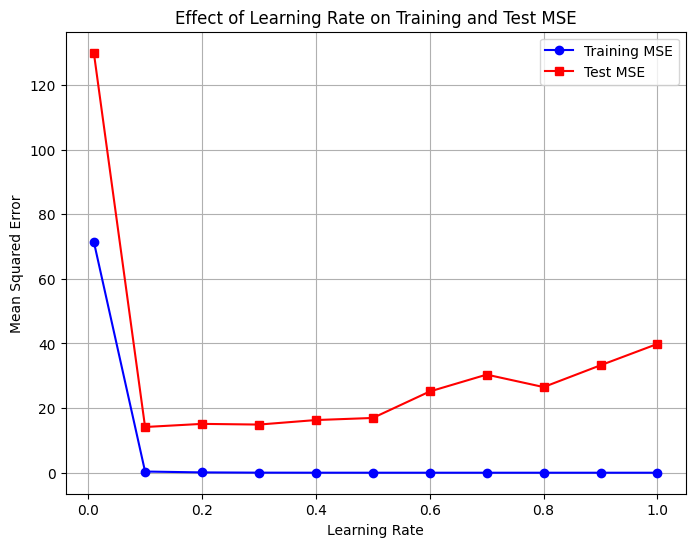

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a synthetic dataset for regression
X, y = make_regression(n_samples=200, n_features=5, n_informative=2, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_mse_results = []
test_mse_results = []

for lr in learning_rates:
    model = xgb.XGBRegressor(max_depth=3, n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mse_results.append(train_mse)

    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mse_results.append(test_mse)

# Plotting learning rate against MSE for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, train_mse_results, marker='o', linestyle='-', color='b', label='Training MSE')
plt.plot(learning_rates, test_mse_results, marker='s', linestyle='-', color='r', label='Test MSE')
plt.title('Effect of Learning Rate on Training and Test MSE')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


# SESSION 3 : ADVANCE XGB : XGBoost Regularization Part 2

code : https://colab.research.google.com/drive/1LA93NSEyfLhjwMTVHy5o7sbU97mfhLdt?usp=sharing


notebook : https://drive.google.com/file/d/1yvsTgKBmqgwnAswr15lagQe8d9UJGnlE/view

## 7. Lambda `reg_alpha` ($\lambda$) and Alpha `reg_alpha` ($\alpha$) `default = 1` $\Longrightarrow$ L-2 regularization

### Where $\lambda$ is used :

1. Similarity Score


2. Gain


3. Output

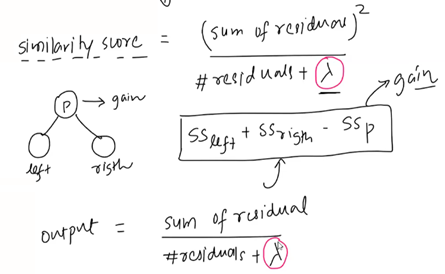

### Effect due to $\lambda$

1. __Similarity Score : Inverse__ $\Longrightarrow\; \lambda \uparrow SS \downarrow$


2. __Gain :__ As SS will decrease so Gain will decrease : __Inverse__ $\Longrightarrow\; \lambda \uparrow \text{GAIN} \downarrow$



3. __Output :__ $\Longrightarrow\; \lambda \uparrow \text{Output} \downarrow$ 

$\text{regularization/shrinkage happens in form of shrinkage}$

#### output : 

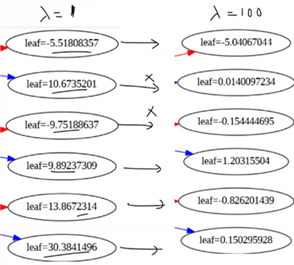

### Effect of $\lambda$ on Pruning


- Pruning is decide on __(Gain - $\gamma$)__


- Here $\gamma$ is fixed.


- If we increase $\lambda$ then Gain will decrease


- If Gain decreases too much then it becomes smaller than $\gamma$ and hence the overall difference of (Gain - $\gamma$) becomes negative.


- Hence the node will be pruned.


- So we can say : 
### $$\lambda (\uparrow)\;\;\text{pruning chance} (\uparrow)\;\;\text{leading to underfitting}$$

### NOTE : lambda ($\lambda$) can be used to control higher gain values to decrease it and with help of  Gamma $(\gamma)$ we will prune it.

### Effect of lambda ($\lambda$) on overfitting and undefitting

$$\lambda \uparrow \text{Overfitting} \downarrow$$


$$\lambda \downarrow \text{Overfitting} \uparrow$$

### Code:

In [13]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib

# Generate a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=100, n_features=5, n_informative=2, noise=0.1, random_state=42)

# Train an XGBoost model for regression
model_reg = xgb.XGBRegressor(max_depth=3, n_estimators=1, random_state=42, reg_lambda=0)
model_reg.fit(X_reg, y_reg)

# Plot the tree with gain values explicitly shown
xgb.plot_tree(model_reg, num_trees=0, rankdir='LR', importance_type='gain')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)


In [15]:
# Get the detailed dump of the tree, including statistics
tree_dump = model_reg.get_booster().get_dump(dump_format='text', with_stats=True)

# Print the tree dump to see the detailed information, including gain for each node
for tree in tree_dump:
    print(tree)


0:[f1<-0.262043864] yes=1,no=2,missing=1,gain=199446.391,cover=100
	1:[f3<0.212661088] yes=3,no=4,missing=3,gain=89346.5469,cover=40
		3:[f4<0.847082794] yes=7,no=8,missing=7,gain=14117.6563,cover=22
			7:leaf=-25.3550987,cover=18
			8:leaf=-45.0587883,cover=4
		4:[f3<1.21251106] yes=9,no=10,missing=9,gain=14107.0693,cover=18
			9:leaf=-5.64628601,cover=13
			10:leaf=13.1044903,cover=5
	2:[f3<-0.30542928] yes=5,no=6,missing=5,gain=90672.7031,cover=60
		5:[f1<0.861156046] yes=11,no=12,missing=11,gain=23259.0859,cover=22
			11:leaf=-10.065115,cover=16
			12:leaf=11.8373671,cover=6
		6:[f3<1.11717129] yes=13,no=14,missing=13,gain=30580.9688,cover=38
			13:leaf=14.6770973,cover=27
			14:leaf=33.4426117,cover=11



### Lambda $\lambda$ is used for L-2 regularization (Mostly it is only used as it performs better)

## 8. Subsample

In XGBoost, the `subsample` parameter is used to control the fraction of the training data that is randomly sampled to grow each tree. 


This technique is similar to bagging and helps to reduce overfitting by introducing randomness into the model. Here’s how `subsample` contributes to reducing overfitting in XGBoost:

### Understanding `subsample`

- **Definition:** `subsample` specifies the fraction of the training data that is used to grow each tree. __It takes a value between 0 and 1.__


- **Default Value:** The default value is typically 1, meaning that all training data is used for each tree. Values less than 1 introduce sampling.

### How `subsample` Helps in Reducing Overfitting


1. **Introducing Randomness:**
   - **Random Sampling:** By using only a subset of the training data for each tree, `subsample` introduces randomness into the model. This helps in reducing the correlation between the trees, making the ensemble more robust and less prone to overfitting.<br></br>
   - **Variance Reduction:** The randomness helps in reducing the variance of the model. While each individual tree might be a bit weaker, the overall ensemble becomes more stable and less likely to overfit the training data.



2. **Preventing Overly Specific Trees:**
   - **Limited Data Per Tree:** Each tree is grown on a different subset of the data, which prevents any single tree from fitting the entire training dataset too closely. This ensures that each tree captures different aspects of the data distribution.<br></br>
   - **Ensemble Effect:** The ensemble of trees, each trained on different subsets, combines these diverse perspectives, leading to a more generalized model.



3. **Improving Generalization:**
   - **Robustness:** Trees trained on different subsets of data are less likely to fit noise and anomalies in the training data. This leads to a model that generalizes better to new, unseen data.<br></br>
   - **Avoiding Overfitting:** By not allowing each tree to see the entire dataset, `subsample` ensures that the trees do not become overly specialized to the training data, thus reducing the risk of overfitting.

### Practical Considerations

1. **Tuning `subsample`:**
   - **Typical Values:** Common values for `subsample` range from 0.5 to 0.9. Lower values increase the randomness and can reduce overfitting, but if set too low, it might lead to underfitting.
   - **Cross-Validation:** The optimal value of `subsample` is usually determined through cross-validation, where different values are tested to find the best balance between bias and variance.



2. **Interaction with Other Parameters:**
   - **`colsample_bytree`, `colsample_bylevel`, `colsample_bynode`:** These parameters control the fraction of features used at different levels and nodes of the tree. Combined with `subsample`, they can add multiple layers of randomness, further helping in reducing overfitting.
   - **Learning Rate:** Using a lower `subsample` value might require adjusting the learning rate (`eta`) to ensure the model converges effectively.

### Summary

- **Role of `subsample`:** Controls the fraction of training data used to grow each tree. Introducing randomness helps reduce overfitting.
- **Mechanism:** By training each tree on a different subset of data, `subsample` reduces the correlation between trees, leading to a more robust ensemble.
- **Optimal Tuning:** Requires cross-validation to find the right balance between randomness and sufficient data for effective training.

By appropriately tuning the `subsample` parameter, you can significantly enhance the generalization ability of your XGBoost model, effectively managing overfitting and ensuring better performance on new data.

0.1 - 13990.319167356132
0.2 - 10271.712832367373
0.3 - 7821.308581281895
0.4 - 6145.554831019812
0.5 - 6344.158268406466
0.6 - 7291.114218491827
0.7 - 5948.0410441070635
0.8 - 6232.283255177946
0.9 - 6998.371614071254
1.0 - 7372.284082259586


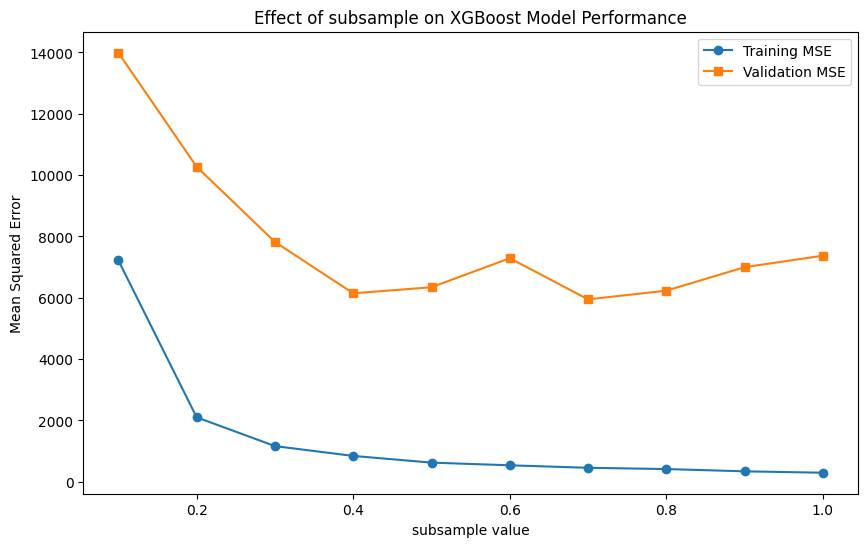

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

subsample_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Different subsample values to be tested
train_mse = []
val_mse = []

for subsample in subsample_values:
    model = xgb.XGBRegressor(objective='reg:squarederror', subsample=subsample, n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_val, y_val_pred))
    print(subsample,"-", mean_squared_error(y_val, y_val_pred))

# Plotting the MSE for different subsample values
plt.figure(figsize=(10, 6))
plt.plot(subsample_values, train_mse, label='Training MSE', marker='o')
plt.plot(subsample_values, val_mse, label='Validation MSE', marker='s')
plt.title('Effect of subsample on XGBoost Model Performance')
plt.xlabel('subsample value')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


## 9. Col Subsample

In XGBoost, column subsampling is controlled by parameters like `colsample_bytree`, `colsample_bylevel`, and `colsample_bynode`. These parameters help in reducing overfitting by introducing randomness into the model, similar to how `subsample` works with rows. Here’s how each of these parameters contributes to reducing overfitting:

### Column Subsampling types:

1. **`colsample_bytree`:**
   - **Definition:** Specifies the fraction of features (columns) to be randomly sampled for each tree.<br></br>
   - **Range:** Takes values between 0 and 1. A value of 1 means using all features, whereas a value less than 1 means using a subset of features.<br></br>
   - **Effect :** When building each tree, **only the specified fraction of features is considered for creating splits throughout the entire tree.**
   
   

2. **`colsample_bylevel`:**
   - **Definition:** Specifies the fraction of features to be randomly sampled for each level of the tree.<br></br>
   - **Range:** Takes values between 0 and 1. It introduces more randomness at each level of the tree.<br></br>
   - **Effect :** **Different subset of features is chosen to create splits at each level. i.e 2 nodes on same level will have same set of features**. This introduces more granularity in randomness compared to `colsample_bytree`.



3. **`colsample_bynode`:**
   - **Definition:** Specifies the fraction of features to be randomly sampled for each split (node) in the tree.<br></br>
   - **Range:** Takes values between 0 and 1. This is the most granular level of column subsampling, introducing randomness at each split decision.<br></br>
   - **Effect:** For **each split decision within the tree, a different subset of features is selected.** This introduces the highest level of granularity in randomness among the three parameters.

### Comparison of Column Subsampling Parameters

| **Parameter**        | **Level of Granularity**    | **Feature Selection**                                   |           
|----------------------|-----------------------------|---------------------------------------------------------|
| `colsample_bytree`   | Tree-Level                  | A subset of features is chosen once per tree.           |
| `colsample_bylevel`  | Level-Level (Depth-Level)   | A subset of features is chosen at each depth of the tree. | 
| `colsample_bynode`   | Node-Level (Split-Level)    | A subset of features is chosen for each split decision.  | 


### Summary

- **`colsample_bytree`:** Subsamples features for each tree, ensuring overall diversity among trees.


- **`colsample_bylevel`:** Subsamples features for each level of the tree, providing intermediate granularity and ensuring diversity at each depth level.


- **`colsample_bynode`:** Subsamples features for each split, offering the highest level of granularity and ensuring maximum diversity at every decision point.

By combining these parameters and tuning them according to the specific dataset and problem, you can effectively reduce overfitting and improve the generalization capability of your XGBoost model.

### How Column Subsampling Helps in Reducing Overfitting

1. **Introducing Randomness:**
   - **Reduced Correlation:** By selecting a random subset of features for each tree, level, or node, column subsampling reduces the correlation between individual trees. This leads to a more diverse ensemble of trees.
   - **Robust Models:** The introduction of randomness helps in creating more robust models that are less sensitive to the specific training data.



2. **Preventing Overly Complex Trees:**
   - **Limited Feature Set:** When each tree or node uses only a subset of features, it prevents any single tree from fitting the training data too closely. This helps in avoiding overly complex trees that may capture noise in the data.
   - **Simpler Models:** By using fewer features, the trees are simpler and less likely to overfit the training data.



3. **Improving Generalization:**
   - **Balanced Feature Use:** Column subsampling ensures that different features are used across different trees and nodes, which helps in capturing a broader range of patterns in the data.
   - **Generalization:** This diversity in feature usage contributes to better generalization to unseen data, as the model is not reliant on a specific subset of features.

### Practical Considerations

1. **Choosing the Right Values:**
   - **Typical Values:** Common values for column subsampling parameters range from 0.5 to 1. Lower values introduce more randomness but might require more trees to maintain performance.
   - **Cross-Validation:** The optimal values are usually determined through cross-validation. Different combinations of `colsample_bytree`, `colsample_bylevel`, and `colsample_bynode` are tested to find the best performance.



2. **Interaction with Other Parameters:**
   - **Subsample:** Combining column subsampling with row subsampling (`subsample`) can further enhance the robustness of the model by introducing randomness in both dimensions.
   - **Learning Rate:** Lower column subsampling values might require adjustments in the learning rate to ensure effective convergence.

### Summary

- **Role of Column Subsampling:** Controls the fraction of features used at different levels of tree building, introducing randomness and reducing correlation between trees.


- **Mechanism:** By using different subsets of features, it prevents trees from becoming overly complex and fitting the training data too closely, thus reducing overfitting.


- **Optimal Tuning:** Requires cross-validation to find the right balance between randomness and performance, often combined with other parameters like `subsample` and learning rate.

By appropriately tuning the column subsampling parameters (`colsample_bytree`, `colsample_bylevel`, `colsample_bynode`), you can significantly enhance the generalization ability of your XGBoost model, effectively managing overfitting and ensuring better performance on new data.

### code for `colsample_bylevel`

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=15, noise=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bylevel=0.5, n_estimators=31, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Get the booster object
booster = model.get_booster()

# Initialize a list to hold the set of features used in each tree
features_in_trees = []

# Loop through each tree and extract feature names
for i, tree in enumerate(booster.get_dump()):
    print(f"Tree {i}:")
    features = set()
    for line in tree.split('\n'):
        if '<' in line or '>' in line:
            # Extract the feature name and add it to the set
            feature = line.split('[')[1].split('<')[0].strip()
            features.add(feature)
    features_in_trees.append(features)
    print(f"Features used: {features}\n")

# If you need to process the features further or analyze them, they are stored in features_in_trees


Tree 0:
Features used: {'f3', 'f9'}

Tree 1:
Features used: {'f9', 'f6'}

Tree 2:
Features used: {'f3', 'f9', 'f1'}

Tree 3:
Features used: {'f3', 'f2', 'f6'}

Tree 4:
Features used: {'f9', 'f2', 'f1', 'f6'}

Tree 5:
Features used: {'f3', 'f9', 'f0'}

Tree 6:
Features used: {'f3', 'f9', 'f6'}

Tree 7:
Features used: {'f3', 'f0', 'f2', 'f6'}

Tree 8:
Features used: {'f3', 'f2', 'f1', 'f6'}

Tree 9:
Features used: {'f0', 'f3', 'f2', 'f8', 'f6'}

Tree 10:
Features used: {'f0', 'f3', 'f8', 'f9', 'f1', 'f6'}

Tree 11:
Features used: {'f0', 'f5', 'f3', 'f7', 'f9', 'f6'}

Tree 12:
Features used: {'f3', 'f9', 'f0', 'f6'}

Tree 13:
Features used: {'f0', 'f5', 'f1', 'f6'}

Tree 14:
Features used: {'f5', 'f3', 'f2', 'f1', 'f6'}

Tree 15:
Features used: {'f3', 'f0', 'f9', 'f1'}

Tree 16:
Features used: {'f0', 'f2', 'f9', 'f1', 'f6'}

Tree 17:
Features used: {'f3', 'f0', 'f9', 'f6'}

Tree 18:
Features used: {'f0', 'f5', 'f3', 'f2', 'f1'}

Tree 19:
Features used: {'f0', 'f5', 'f3', 'f2', 'f9'}

Tree

### code for `colsample_bytree`

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models with different colsample_bytree values
for colsample_bytree in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=colsample_bytree, n_estimators=100, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"colsample_bytree={colsample_bytree}: MSE = {mse}")

colsample_bytree=1.0: MSE = 8591.182639135071
colsample_bytree=0.9: MSE = 9325.8896747635
colsample_bytree=0.8: MSE = 8687.84098301825
colsample_bytree=0.7: MSE = 8232.368757319447
colsample_bytree=0.6: MSE = 7845.575964329464
colsample_bytree=0.5: MSE = 7101.163193311454
colsample_bytree=0.4: MSE = 6521.262269375816
colsample_bytree=0.3: MSE = 5208.215028313634
colsample_bytree=0.2: MSE = 6547.5074353749105
colsample_bytree=0.1: MSE = 9592.798629677993


# SESSION 4 : ADVANCE XGB : XGBoost Optimization

notebook : https://drive.google.com/file/d/1P3B0X6Vahs6NNxovCG8cdH2ETARMkXym/view



code : https://colab.research.google.com/drive/1yLdcPwZMFTcz7xLlgGfULbw3sj_UgG2g?usp=sharing

## Exact Greedy Algorithm: best splitting

The Exact Greedy Algorithm in XGBoost is a method for constructing decision trees by exhaustively searching for the best split at each node.


It ensures that each split is optimal with respect to the chosen objective function, leading to high-quality trees. However, it can be computationally expensive, especially with large datasets and many features.

- __To get the number of splitting criteria for each node:__<br></br>
    - for **n** rows/data points, criteria = (n-1) times<br></br>
    - for **m** number of columns, criteria  = m times<br></br>
    - overall = **m \* (n-1)**<br></br>
    - eg : for 100 rows and 100 columns, total splitting criteria = 100 * 99 = 9900 splitting criteria

## Improvement 1 : The Approximate Method (quantile sketch)

The Approximate Method in XGBoost is designed to reduce the computational complexity of finding the best split during the construction of decision trees. Instead of evaluating all possible split points, the approximate method uses heuristics and approximations to speed up the process. 

### Key Concepts:

1. **Quantile Sketching**:
   - Instead of evaluating every possible split point, the approximate method uses a __quantile sketch__ to summarize the distribution of feature values.<br></br>
   - This involves creating a summary that captures the essential characteristics of the feature values, such as their quantiles.<br></br>
   - The quantile sketch is then used to select a subset of candidate split points, rather than considering all possible splits.



2. **Weighted Quantile Sketch**:
   - In datasets with uneven distributions or weights, a weighted quantile sketch is used.<br></br>
   - This ensures that the sketch accurately reflects the distribution of the data, even when some samples are more important than others.<br></br>



3. **Histogram-based Methods**:
   - The approximate method may also use histogram-based techniques.<br></br>
   - Features are binned into a fixed number of discrete bins.<br></br>
   - The split points are then chosen based on the boundaries of these bins, reducing the number of potential splits that need to be evaluated.

### Steps Involved:

1. **Initialization**:
   - Similar to the exact method, the approximate method starts with a root node containing all the training data.


2. **Sketching and Binning**:
   - For each feature, the algorithm computes a quantile sketch or bins the data into histograms.<br></br>
   - This reduces the number of candidate split points to a manageable level.


3. **Split Evaluation**:
   - The algorithm evaluates the gain for each candidate split point generated from the sketch or bins.<br></br>
   - The gain is calculated in a similar manner to the exact method, using the chosen objective function and regularization terms.


4. **Split Selection**:
   - The split with the highest gain is selected.<br></br>
   - If the gain is below a certain threshold (gamma), the node is not split, making it a leaf node.


5. **Recursive Splitting**:
   - The data is partitioned based on the selected split, and the process is recursively applied to each subset.<br></br>
   - The process continues until stopping criteria are met (e.g., maximum depth, minimum number of samples in a node, etc.).


6. **Tree Pruning**:
   - After constructing the tree, pruning may be performed to remove nodes that do not significantly contribute to model performance.

### Advantages of the Approximate Method:

- **Efficiency**: Reduces the computational burden by limiting the number of split points considered.


- **Scalability**: More suitable for large datasets and high-dimensional data.


- **Speed**: Faster tree construction compared to the exact greedy method.

By using these approximations, XGBoost can construct decision trees more quickly, making it feasible to use with large-scale data while still maintaining high model performance.

### Step 1 : Dividing data into quantiles ->3 quantile

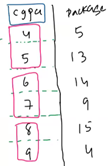

### Step 2 : We calculate "g" and "h" for every data point

- where **g** is Gradient and **h** is hessians



- for regression $L = \frac{1}{2}\;(y - \hat y)^2$


- so Gradient **g** = $\frac{dL}{d \hat y} = \hat y - y$ (predicted - actual)


- Hessian = $\frac{dg}{d \hat y} = 1$

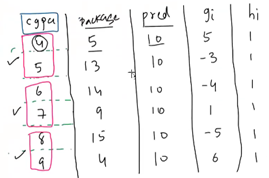

### Step 3 : Create histogram of Hessians and Gradients based on the group of quantiles

-  Calculate $G_1, G_2,....G_n$ and $H_1, H_2,.....H_n$ based on each quantile

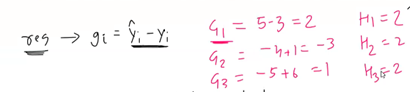

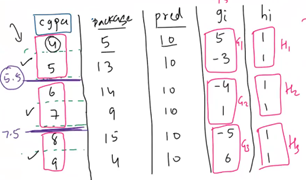

- create historgram with these values with base as quantile buckets: 

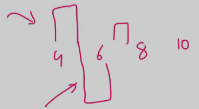

### Step 3a : Save these G and H in cache memory to make process faster

### Step 4 : try out different splitting criterias : (5.5, 7.5)

$$\text{Similarity Score} = \frac{\text{Sum of residuals}^2}{\text{number of residuals} + \lambda}$$

- $\lambda$ = 0


- the formula can also be written as :

$$\text{Similarity Score} = \frac{\text{Sum of Gradients}^2}{\text{Sum of Hessians}}$$

#### for 1st quantile : cgap < 5.5

$$\text{Similarity Score for root node} = \frac{\text{Sum of all Gradients }^2}{\text{Sum of all Hessians}}$$

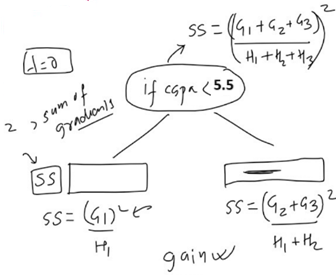

- calculate gain

#### for 2nd quantile : cgap < 7.5

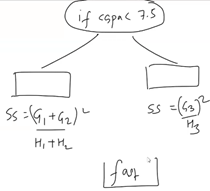

### G1,G2,....Gn and H1,H2...Hn are already calculated in cache memory. Hence the algorithm need not calculate it in each Step. So the entire process becomes very fast.

### How parallel processing works in XGBoost

Each set of Qunatiles can be send to different cores of CPU seperately and their **g and h** can be calulated independently. Hence, making the process fast and parallel.


**NOTE : We can save G and H (of each qunatiles) and save them in cache to make the process faster. As we need G and H eaverytime**

## Improvement 3 : Quantile Sketch -> no sorting for huge datasets

#### As data can be too huge and for creating quantiles we need to first sort the data. This process can take too much.

A **sketch** is a type of data structure or algorithm that
processes large data streams or datasets to create a
summary or approximation, allowing for efficient
computations while using limited memory. The concept is
particularly useful in scenarios where it's impractical to store
or process the entire dataset due to resource constraints.


A **quantile sketch** estimates the quantiles of a dataset
without the need to store or sort the entire dataset.

### Benefits of Quantile Sketch

1. __Efficiency :__ They enable efficient computation of approximate quantiles **without
sorting the entire dataset**, reducing time and computational resources.



2. __Scalability :__ Quantile sketches help XGBoost efficiently handle large datasets by
summarizing data distributions compactly, which is crucial for processing big data.


3. __Memory Usage :__ They reduce memory requirements by providing a summarized
representation of the data, avoiding the need to store all individual data points.



4. __Split Selection :__ Quantile sketches allow for effective and approximate
identification of potential split points in the data, facilitating the decision-making
process in tree construction.


5. __Distributed Processing :__ In distributed environments, quantile sketches can be
combined across different data subsets, enabling XGBoost to effectively approximate split points even when data is scattered across multiple machines.

## Improvement 4 - Weighted Quantile Sketch -> only for classification

#### all buckets will not have same number of points but sum of weights of all buckets will be same


#### For classification problems we can consider the heissian value of each point as it's weight. h = p (1-p)


#### sum of all hessian will be equal


#### cannot be applied on regression problems as hessian in regression for each point is 1



#### slower the normal quantile method

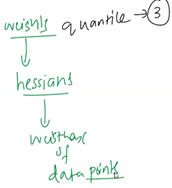

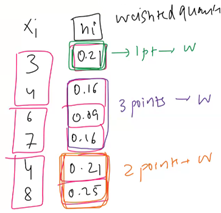

- __Purpose :__ Like a standard quantile sketch, a weighted quantile sketch provides a way to
estimate quantiles. However, it accounts for weights associated with each data point, offering
a more nuanced summary of the dataset.


- __Usage :__ This is particularly useful in datasets where some observations are more important or
occur more frequently than others, and this significance is represented by weights.

### Key Difference:


**Quantile Sketch :** Assumes all data points are equally important.



**Weighted Quantile Sketch :** Considers the varying importance (weights) of data points, providing a more accurate summary for weighted data.

## All the optimizations used in XGB to make it fast

Problem was that for splitting we were using all the data points. So it will take a lot of time.


To overcome we use the below methods, we use the below Optimizations:


1. Decrease number of data points, try out splitting on based of Quantile.


2. calculating **g, G, h and H** parallely for each points and buckets and saving.



3. saving **G and H** in cache memory for faster access.


4. If data is too big and we are unable to calculate qunatiles, then we calculate approx quantiles ie. __quantile sketch.__


5. Performance improving but speed decreasing : __Weighted quantile sketch for classification__

## Code :

### exact vs approx method : 

In [1]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time

# Generate a large synthetic dataset
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model using the exact method
exact_model = xgb.XGBClassifier(tree_method='exact', max_depth=6, verbosity=0)

# Define the model using the approx method
approx_model = xgb.XGBClassifier(tree_method='approx', max_depth=6, verbosity=0)

# Train the exact model and measure the time
start_time = time()
exact_model.fit(X_train, y_train)
exact_duration = time() - start_time
exact_predictions = exact_model.predict(X_test)
print(f"Training time for 'exact' method: {exact_duration:.3f} seconds")

# Evaluate the exact model
exact_accuracy = accuracy_score(y_test, exact_predictions)
exact_precision = precision_score(y_test, exact_predictions)
exact_recall = recall_score(y_test, exact_predictions)
exact_f1 = f1_score(y_test, exact_predictions)

print(f"Accuracy (Exact): {exact_accuracy:.3f}")
print(f"Precision (Exact): {exact_precision:.3f}")
print(f"Recall (Exact): {exact_recall:.3f}")
print(f"F1 Score (Exact): {exact_f1:.3f}")

# Train the approx model and measure the time
start_time = time()
approx_model.fit(X_train, y_train)
approx_duration = time() - start_time
approx_predictions = approx_model.predict(X_test)
print(f"\nTraining time for 'approx' method: {approx_duration:.3f} seconds")

# Evaluate the approx model
approx_accuracy = accuracy_score(y_test, approx_predictions)
approx_precision = precision_score(y_test, approx_predictions)
approx_recall = recall_score(y_test, approx_predictions)
approx_f1 = f1_score(y_test, approx_predictions)

print(f"Accuracy (Approx): {approx_accuracy:.3f}")
print(f"Precision (Approx): {approx_precision:.3f}")
print(f"Recall (Approx): {approx_recall:.3f}")
print(f"F1 Score (Approx): {approx_f1:.3f}")


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training time for 'exact' method: 5.181 seconds
Accuracy (Exact): 0.870
Precision (Exact): 0.858
Recall (Exact): 0.887
F1 Score (Exact): 0.873


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Training time for 'approx' method: 1.968 seconds
Accuracy (Approx): 0.866
Precision (Approx): 0.855
Recall (Approx): 0.883
F1 Score (Approx): 0.869


### increasing number of quantiles for better results : increasing number of bins

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in 

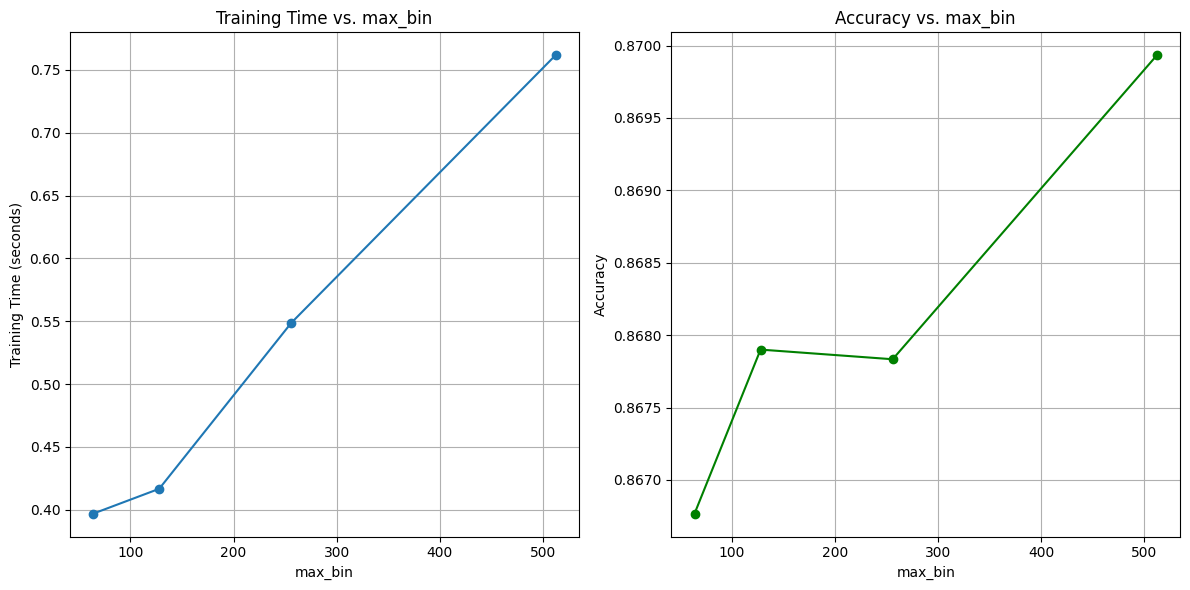

In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

# Generate a smaller dataset to expedite the demonstration
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_bin values to test
max_bins = [64, 128, 256, 512]

# Initialize lists to store training times and accuracies
training_times = []
accuracies = []

# Loop over max_bin values
for max_bin in max_bins:
    model = xgb.XGBClassifier(tree_method='hist', max_depth=6, max_bin=max_bin, verbosity=0)

    # Measure training time
    start_time = time()
    model.fit(X_train, y_train)
    training_times.append(time() - start_time)

    # Predict and calculate accuracy
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training time plot
ax[0].plot(max_bins, training_times, marker='o')
ax[0].set_title('Training Time vs. max_bin')
ax[0].set_xlabel('max_bin')
ax[0].set_ylabel('Training Time (seconds)')
ax[0].grid(True)

# Accuracy plot
ax[1].plot(max_bins, accuracies, marker='o', color='green')
ax[1].set_title('Accuracy vs. max_bin')
ax[1].set_xlabel('max_bin')
ax[1].set_ylabel('Accuracy')
ax[1].grid(True)

plt.tight_layout()
plt.show()


# SESSION 5 : ADVANCE XGB : Missing Values in XGBoost

Code : https://colab.research.google.com/drive/17qgja8XHnjCLIXTOdxSEwcSBwQdR4Y-Q?usp=sharing


Notes : https://drive.google.com/file/d/1I6ygm-VxKOY19tJdjM26C1WsuNgS9Bhl/view


## XGBoost can natively handle Missing values

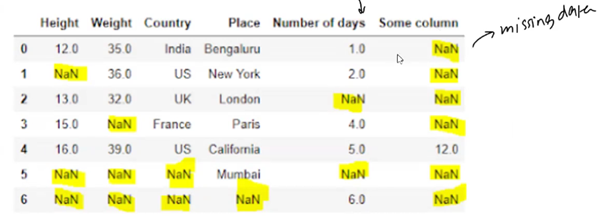

### Trying to apply model with missing values in Linear regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Generating a toy dataset
np.random.seed(0)
X = np.random.rand(100, 2)
y = X @ np.array([1.5, -2]) + np.random.normal(0, 0.1, 100)

# Introducing missing values in the first feature
X[20:40, 0] = np.nan

X

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [       nan, 0.43703195],
       [       nan, 0.06022547],
       [       nan, 0.67063787],
       [       nan, 0.1289263 ],
       [       nan, 0.36371077],
       [       nan, 0.43860151],
       [       nan, 0.10204481],
       [       nan, 0.16130952],
       [       nan, 0.2532916 ],
       [       nan, 0.24442559],
       [  

In [2]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Trying Linear Regression (this should fail due to missing values)
lr = LinearRegression()
try:
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred)}")
except ValueError as e:
    print(f"Linear Regression Error: {e}")

Linear Regression Error: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [4]:
# Now, using XGBoost which can handle missing values
xgb = XGBRegressor(max_depth=3)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}")

XGBoost MSE: 0.17584667664451617


## Through Sparsity Aware Split Findings XGBoost handles missing values

#### LightGBM and Catboost can also handle missing values

## Steps how XGBoost Handles Missing Values

1. **Initialization**:
    - XGBoost starts by initializing the parameters and setting up the data structure for the training dataset.
    - The algorithm identifies the missing values in the dataset.



2. **Split Finding**:
    - XGBoost builds decision trees by iteratively finding the best splits for the data.
    - During this process, XGBoost evaluates splits based on the gain (improvement in model performance) they provide.
    


3. **Handling Missing Values**:
    - For each split candidate, XGBoost considers the scenario where missing values go to either the left or the right child node.
    - The algorithm calculates the gain for both scenarios (i.e., sending missing values to the left or the right).



4. **Optimal Split Decision**:
    - XGBoost chooses the scenario (left or right) that results in the highest gain for missing values.
    - Missing values are directed to the child node (left or right) that provides the best improvement in the objective function.



5. **Tree Building**:
    - This process is repeated recursively to build the decision tree.
    - XGBoost continues to handle missing values in each node by directing them to the optimal child node based on the calculated gain.



6. **Prediction**:
    - When making predictions with the trained model, XGBoost handles missing values in the input data by following the same strategy used during training (i.e., sending missing values to the appropriate child nodes).

## Steps with example : 

Let's consider a simple dataset with two columns: `Input` and `Output`, containing 7 rows. We'll introduce 3 missing values in the `Input` column.

### Sample Dataset
| f(Input) | t(Output) |
|-------|--------|
| 1   | 10      |
| NaN  | 20      |
| 3   | 30      |
| NaN   | 40      |
| 5   | 50      |


Here, `NaN` represents the missing values in the `Input` column.

### Step 1 : calculate baseline prediction (mean) and the residual

| f(Input) | t(Output) | Mean | Residual |
|-------|--------|-------|--------|
| 1   | 10      | 30   | 20      |
| NaN  | 20      | 30   | 10      |
| 3   | 30      | 30   | 0      |
| NaN   | 40      | 30   | -10      |
| 5   | 50      | 30   | -20      |


### Step 2 : break table into 2 parts. 1st part with all non-missing rows and 2nd with missing rows

| f(Input) | t(Output) | Mean | Residual |        
|-------|--------|-------|--------|
| 1   | 10      | 30   | 20      |
| 3   | 30      | 30   | 0      |
| 5   | 50      | 30   | -20      |






| f(Input) | t(Output) | Mean | Residual |        
|-------|--------|-------|--------|
| NaN  | 20      | 30   | 10      |
| NaN   | 40      | 30   | -10      |


### Step 3 : Decision tree is always created on non-missing value table and calculate splitting criteria

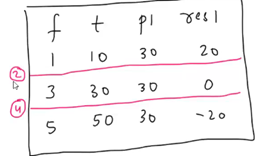

#### Step 3.1 : Split data on f <2 :

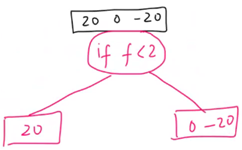

#### Step 3.2 : Bring the missing values in picture, the above tree will be split into further tress by keeping the residual of missing table either on left or right and caluclate the both Gains:

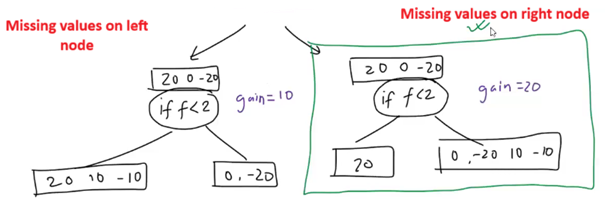

#### Step 3.3 : Split on f<4 (2nd splitting criteria) with the non-missing table residuals

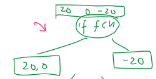

#### Step 3.4 : Adding the residual from missing value table into both left and right node and calculating the GAIN :

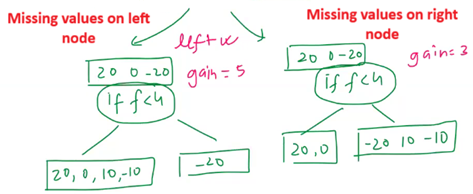

### Step 4 : As gain is highest from f<2 and missing values on right node, we will select that tree

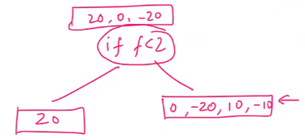

### Step 5 : Split already done on f<2, now we will further split the residuals on right node with f<4 as :

| f(Input) | t(Output) | Mean | Residual |        
|-------|--------|-------|--------|
| 1   | 10      | 30   | 20      |
| 3   | 30      | 30   | 0      |
| 5   | 50      | 30   | -20      |






| f(Input) | t(Output) | Mean | Residual |        
|-------|--------|-------|--------|
| NaN  | 20      | 30   | 10      |
| NaN   | 40      | 30   | -10      |


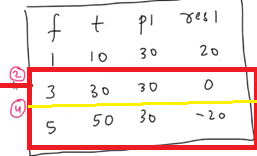

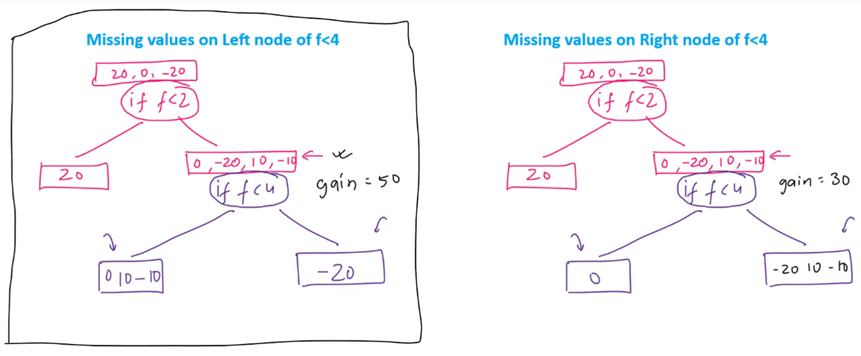

### Step 6 : As gain is high on left side, we will construct our final tree :

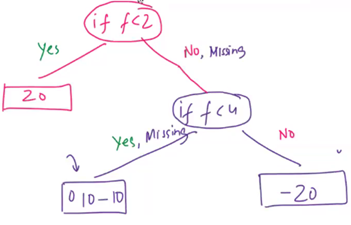

### Step 7 : calculating Output of leaf nodes : 

$$\text{Output of each leaf node} = \frac{\text{Sum of residuals on the leaf node}}{\text{number of residuals on the leaf node}+\lambda}$$

<Figure size 1500x1200 with 0 Axes>

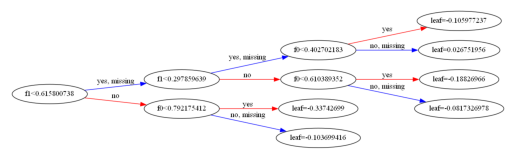

In [12]:
from xgboost import XGBRegressor, plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree
plt.figure(figsize=(15, 12))
plot_tree(xgb, num_trees=1, rankdir='LR')  # 'LR' is for left-to-right tree orientation
plt.show()

## Set `'missing': np.nan` while defining params for the model

## Code : 

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Generate a toy regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=1)
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df['Target'] = y

# Introduce random missing values (less than 5% in each feature)
for col in df.columns[:-1]:  # Exclude target column
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

# Inspect the dataset
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5      Target
0   1.869022  -1.593148   2.301561  -1.106284   0.990264  132.880021
1  -1.043400   1.320418   0.471534   0.956689   0.518969  -13.366442
2   0.194242  -1.061130  -0.366098   0.938927  -1.323831   -8.637123
3   0.463217   0.475341  -0.688159   1.750722   0.565973  108.329759
4  -0.108010   0.567931  -1.146575   0.423871  -0.692175  -18.626612


In [30]:
# Split features and target
X_train = df.drop(columns=['Target'])
y_train = df['Target']

# Ensure column names are strings
X_train.columns = [str(col) for col in X_train.columns]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train XGBoost model without imputation (XGBoost handles missing values)
default_model = XGBRegressor(max_depth=4, n_estimators=10, eta=0.1, objective='reg:squarederror')

In [33]:
default_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
preds_default = default_model.predict(X_test)
mse_default = mean_squared_error(y_test, preds_default)

print(f"MSE for default handling of missing values: {mse_default}")

MSE for default handling of missing values: 7450.965461860968


# CPU vs GPU

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generating a synthetic dataset
X, y = make_classification(n_samples=1000000, n_features=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
import xgboost as xgb
import time

# Configure parameters for CPU
params_cpu = {
    'objective': 'binary:logistic',
    'tree_method': 'hist',  # Using histogram-based method on CPU
    'eval_metric': 'logloss'
}

# Train on CPU
cpu_start = time.time()
model_cpu = xgb.XGBClassifier(**params_cpu)
model_cpu.fit(X_train, y_train)
cpu_end = time.time()

print(f"Training time with CPU: {cpu_end - cpu_start} seconds")


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training time with CPU: 5.385054349899292 seconds


In [38]:
# Specify the parameters for XGBClassifier, setting device to 'cuda' for GPU usage
params_gpu = {
    'objective': 'binary:logistic',
    'tree_method': 'hist',  # Use histogram-based method
    'eval_metric': 'logloss',
    'device': 'cuda'  # Use CUDA for GPU computation
}

# Train on GPU
gpu_start = time.time()
model_gpu = xgb.XGBClassifier(**params_gpu)
model_gpu.fit(X_train, y_train)
gpu_end = time.time()

print(f"Training time with GPU: {gpu_end - gpu_start} seconds")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training time with GPU: 5.5683417320251465 seconds


### single core vs multi core (don't run again)

In [39]:
import time
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generating a synthetic dataset
X, y = make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and time XGBoost with a specified number of threads
def train_xgboost(nthread):
    model = XGBClassifier(nthread=nthread)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    return end_time - start_time

# Training using all available cores
multi_core_duration = train_xgboost(nthread=-1)
print(f"Training time with all available cores: {multi_core_duration} seconds")

# Training using a single core
single_core_duration = train_xgboost(nthread=1)
print(f"Training time with a single core: {single_core_duration} seconds")


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training time with all available cores: 5.085726737976074 seconds


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training time with a single core: 35.991952419281006 seconds
